<a href="https://colab.research.google.com/github/AnastasiyaRahulina/Birth_weight_intervals_prediction/blob/main/BW_prediction_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Kaggle/birthweight/train.csv')
train_data = train_data.drop(columns = ['id'], axis = 1)

test_data = pd.read_csv('/content/drive/MyDrive/Kaggle/birthweight/test.csv')
test_data = test_data.drop(columns = ['id'], axis = 1)

submission = pd.read_csv('/content/drive/MyDrive/Kaggle/birthweight/sample_submission.csv')

print(f"The dimension of the train dataset is {train_data.shape}")
print(f"The dimension of the test dataset is {test_data.shape}")

The dimension of the train dataset is (108082, 37)
The dimension of the test dataset is (5689, 36)


In [ ]:
train_data.head(5)

,ATTEND,BFACIL,BMI,CIG_0,DLMP_MM,DMAR,DOB_MM,DOB_TT,DOB_WK,FAGECOMB,...,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN,DBWT
0,1,1,18.5,0,12,,10,1434,5,99,...,0,0,108,1,1,N,0,F,24,2800
1,1,1,18.3,2,4,1,12,2156,6,39,...,2,1,100,1,1,N,0,M,18,1900
2,1,1,27.3,0,3,2,12,1241,2,31,...,2,2,135,4,1,Y,2,F,27,2960
3,1,1,24.0,0,7,2,4,1649,2,99,...,0,0,111,3,1,N,0,M,29,3657
4,2,1,23.6,0,6,1,3,752,2,31,...,2,0,121,4,1,Y,2,F,37,3742


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108082 entries, 0 to 108081
Data columns (total 37 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ATTEND       108082 non-null  int64  
 1   BFACIL       108082 non-null  int64  
 2   BMI          108082 non-null  float64
 3   CIG_0        108082 non-null  int64  
 4   DLMP_MM      108082 non-null  int64  
 5   DMAR         108082 non-null  object 
 6   DOB_MM       108082 non-null  int64  
 7   DOB_TT       108082 non-null  int64  
 8   DOB_WK       108082 non-null  int64  
 9   FAGECOMB     108082 non-null  int64  
 10  FEDUC        108082 non-null  int64  
 11  ILLB_R       108082 non-null  int64  
 12  ILOP_R       108082 non-null  int64  
 13  ILP_R        108082 non-null  int64  
 14  LD_INDL      108082 non-null  object 
 15  MAGER        108082 non-null  int64  
 16  MBSTATE_REC  108082 non-null  int64  
 17  MEDUC        108082 non-null  int64  
 18  M_Ht_In      108082 non-

In [ ]:
train_data.isnull().sum()

ATTEND         0
BFACIL         0
BMI            0
CIG_0          0
DLMP_MM        0
DMAR           0
DOB_MM         0
DOB_TT         0
DOB_WK         0
FAGECOMB       0
FEDUC          0
ILLB_R         0
ILOP_R         0
ILP_R          0
LD_INDL        0
MAGER          0
MBSTATE_REC    0
MEDUC          0
M_Ht_In        0
NO_INFEC       0
NO_MMORB       0
NO_RISKS       0
PAY            0
PAY_REC        0
PRECARE        0
PREVIS         0
PRIORDEAD      0
PRIORLIVE      0
PRIORTERM      0
PWgt_R         0
RDMETH_REC     0
RESTATUS       0
RF_CESAR       0
RF_CESARN      0
SEX            0
WTGAIN         0
DBWT           0
dtype: int64

In [ ]:
train_data.describe()

,ATTEND,BFACIL,BMI,CIG_0,DLMP_MM,DOB_MM,DOB_TT,DOB_WK,FAGECOMB,FEDUC,...,PREVIS,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESARN,WTGAIN,DBWT
count,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,...,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000,108082.000000
mean,1.330046,1.033891,28.848412,1.557336,10.949048,6.570835,1233.242085,4.055162,39.630447,4.903842,...,13.532670,0.236598,1.290409,0.721665,176.276216,1.796691,1.331582,0.258776,31.566949,3260.113654
std,0.765864,0.310660,12.731588,8.217045,19.837302,3.421184,632.722133,1.855129,22.471849,2.303684,...,14.408799,4.681943,4.100238,5.461285,125.323220,1.166049,0.533019,1.987953,19.113690,589.548274
min,1.000000,1.000000,13.200000,0.000000,1.000000,1.000000,0.000000,1.000000,14.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,75.000000,1.000000,1.000000,0.000000,0.000000,227.000000
25%,1.000000,1.000000,22.300000,0.000000,4.000000,4.000000,801.000000,2.000000,28.000000,3.000000,...,9.000000,0.000000,0.000000,0.000000,130.000000,1.000000,1.000000,0.000000,20.000000,2965.000000
50%,1.000000,1.000000,25.800000,0.000000,7.000000,7.000000,1238.000000,4.000000,33.000000,4.000000,...,12.000000,0.000000,1.000000,0.000000,150.000000,1.000000,1.000000,0.000000,30.000000,3300.000000
75%,1.000000,1.000000,31.200000,0.000000,10.000000,10.000000,1735.000000,6.000000,38.000000,6.000000,...,14.000000,0.000000,2.000000,1.000000,182.000000,3.000000,2.000000,0.000000,40.000000,3629.000000
max,9.000000,9.000000,99.900000,99.000000,99.000000,12.000000,9999.000000,7.000000,99.000000,9.000000,...,99.000000,99.000000,99.000000,99.000000,999.000000,9.000000,4.000000,99.000000,99.000000,6840.000000


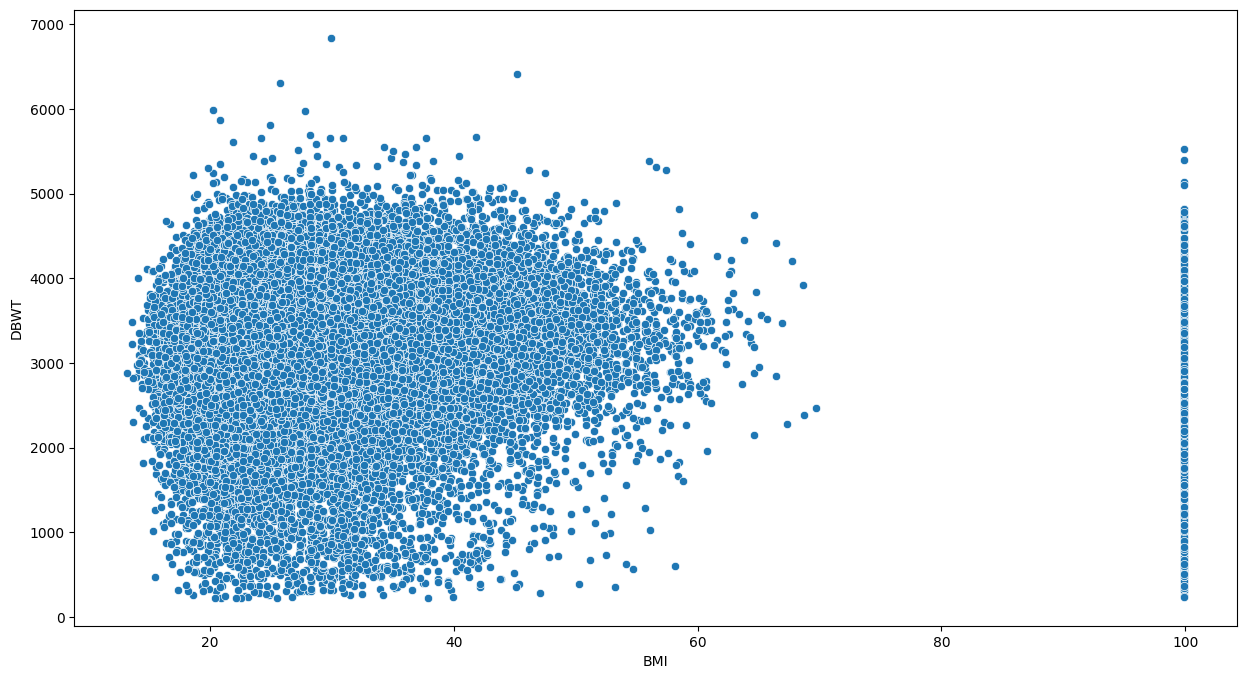

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='BMI',y='DBWT',data=train_data)
plt.show()

<ipython-input-385-68b67fa36d98>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True)


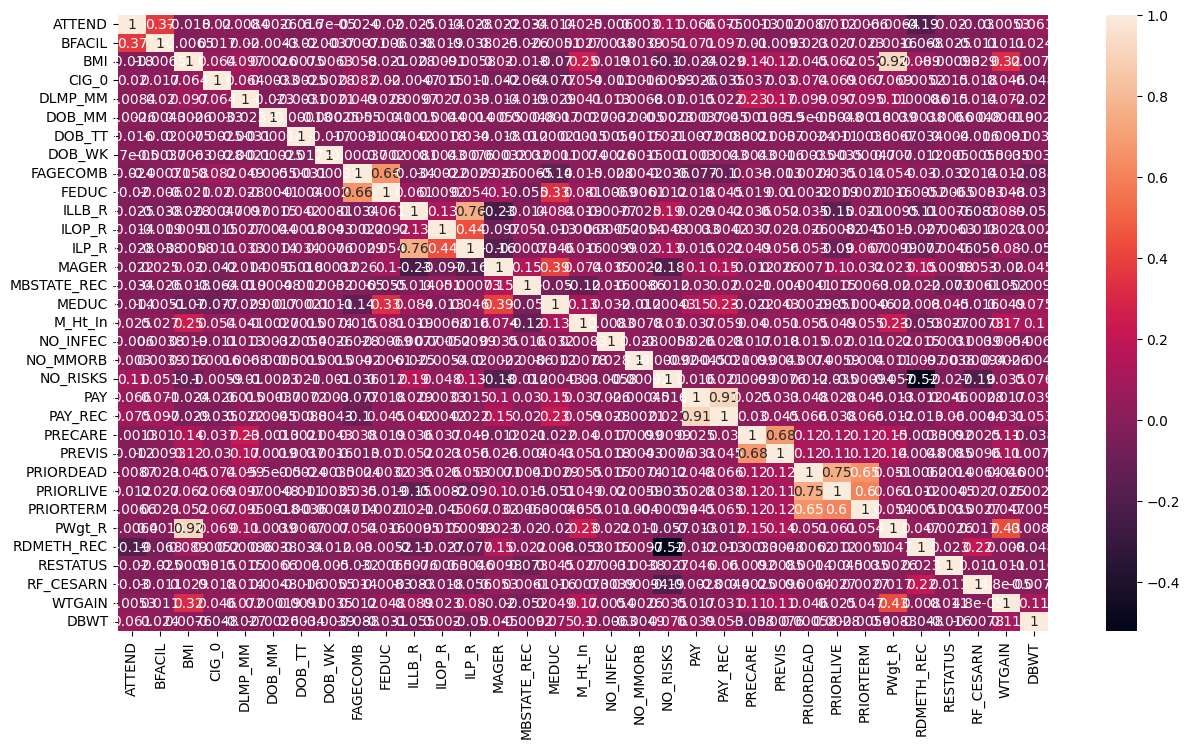

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

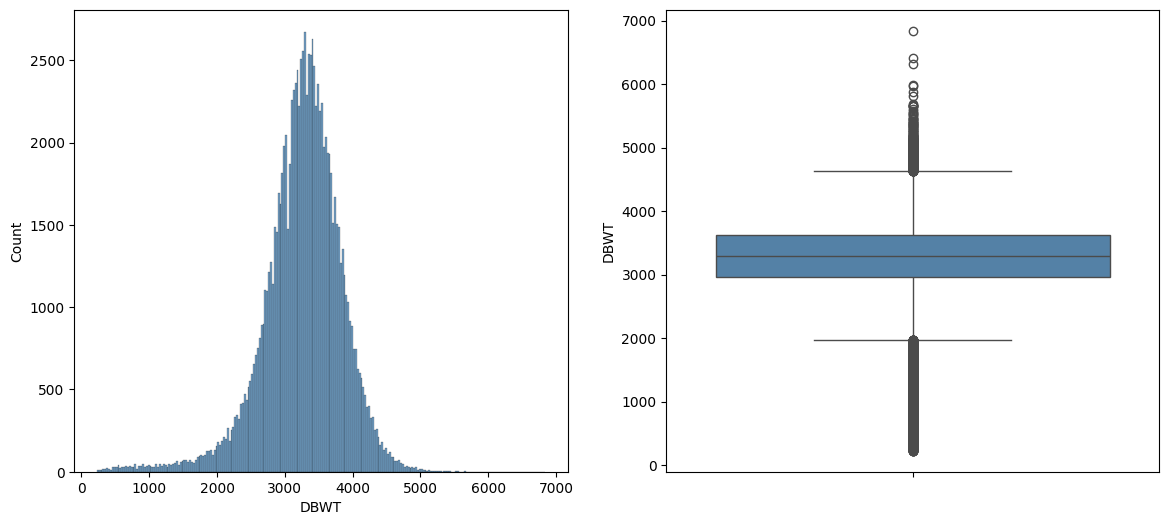

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (14, 6))

sns.histplot(ax = axes[0], data = train_data, x = 'DBWT', color = 'steelblue');
sns.boxplot(ax = axes[1], data = train_data, y = 'DBWT', color = 'steelblue');

#Feature preparation

I will look closerat each feature and try to understand it and make some corrections

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108082 entries, 0 to 108081
Data columns (total 37 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ATTEND       108082 non-null  int64  
 1   BFACIL       108082 non-null  int64  
 2   BMI          108082 non-null  float64
 3   CIG_0        108082 non-null  int64  
 4   DLMP_MM      108082 non-null  int64  
 5   DMAR         108082 non-null  object 
 6   DOB_MM       108082 non-null  int64  
 7   DOB_TT       108082 non-null  int64  
 8   DOB_WK       108082 non-null  int64  
 9   FAGECOMB     108082 non-null  int64  
 10  FEDUC        108082 non-null  int64  
 11  ILLB_R       108082 non-null  int64  
 12  ILOP_R       108082 non-null  int64  
 13  ILP_R        108082 non-null  int64  
 14  LD_INDL      108082 non-null  object 
 15  MAGER        108082 non-null  int64  
 16  MBSTATE_REC  108082 non-null  int64  
 17  MEDUC        108082 non-null  int64  
 18  M_Ht_In      108082 non-

In [ ]:
def show_num_feature(feature):
    fig, axes = plt.subplots(1, 2, figsize = (14, 7))
    sns.histplot(ax = axes[0], data = train_data, x = feature, color = 'steelblue')
    sns.scatterplot(x = feature, y = "DBWT", data = train_data, color = 'steelblue')
#function to preview numerical features distribution

def show_cat_feature(feature):
    fig, axes = plt.subplots(1, 2, figsize = (14, 7))
    sns.barplot(x=train_data[feature],y=train_data['DBWT'], data=train_data),
    sns.histplot(ax = axes[0], data = train_data, x = feature, color = 'steelblue');
    return train_data[feature].value_counts()
#function to preview categorical features distribution

def convert_to_median(feature):
  median = train_data[feature].loc[train_data[feature] < 90].median()
  train_data[feature] = train_data[feature].apply(lambda x: median if x == 99 else x)
  test_data[feature] = test_data[feature].apply(lambda x: median if x == 99 else x)
#function to convert missing features to median

## ATTEND

ATTEND = Attendant at Birth,
Five options for title of attendant at birth are identified in a checkbox format:

1) MD (medical
doctor)

2) DO (osteopath)

3) CNM/CM (certified nurse midwife/certified midwife)

4) other midwife

5) other (must be specified).

If the item is not completed (i.e., none of the boxes are checked), it is
classified as “Not stated”.

In [ ]:
train_data['ATTEND'].value_counts()

1    87407
3    10140
2     8694
5      895
4      890
9       56
Name: ATTEND, dtype: int64

<Axes: xlabel='ATTEND', ylabel='DBWT'>

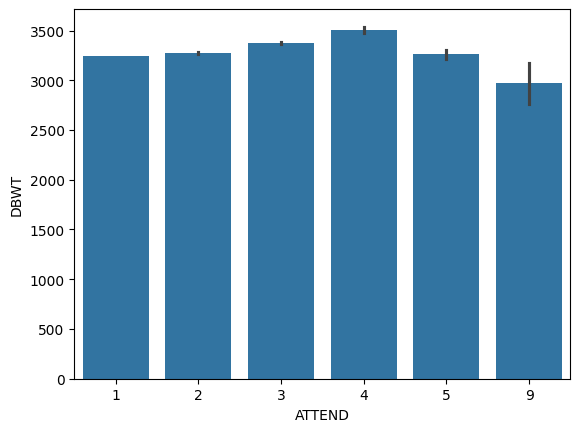

In [ ]:
sns.barplot(x=train_data['ATTEND'],y=train_data['DBWT'], data=train_data)

In [ ]:
train_data['ATTEND'].dtype

dtype('int64')

In [ ]:
train_data['ATTEND'] = train_data['ATTEND'].astype('category')
test_data['ATTEND'] = test_data['ATTEND'].astype('category')
#code back in the category data type

## BFACIL

BFACIL = Birth Place

1 Hospital
2 Freestanding Birth Center
3 Home (intended)
4 Home (not intended)
5 Home (unknown if intended)
6 Clinic / Doctor’s Office
7 Other
9 Unknown

In [ ]:
train_data['BFACIL'].value_counts()

1    106342
3       801
2       587
4       133
5       123
7        70
6        15
9        11
Name: BFACIL, dtype: int64

<Axes: xlabel='BFACIL', ylabel='DBWT'>

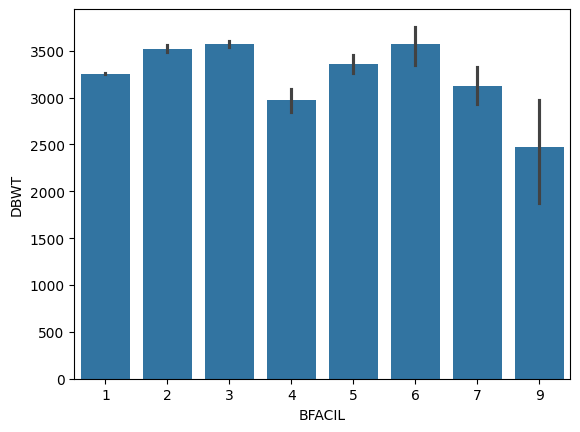

In [ ]:
sns.barplot(x=train_data['BFACIL'],y=train_data['DBWT'], data=train_data)

In [ ]:
train_data['BFACIL'] = train_data['BFACIL'].astype('category')
test_data['BFACIL'] = test_data['BFACIL'].astype('category')
#code back in the category data type

## BMI

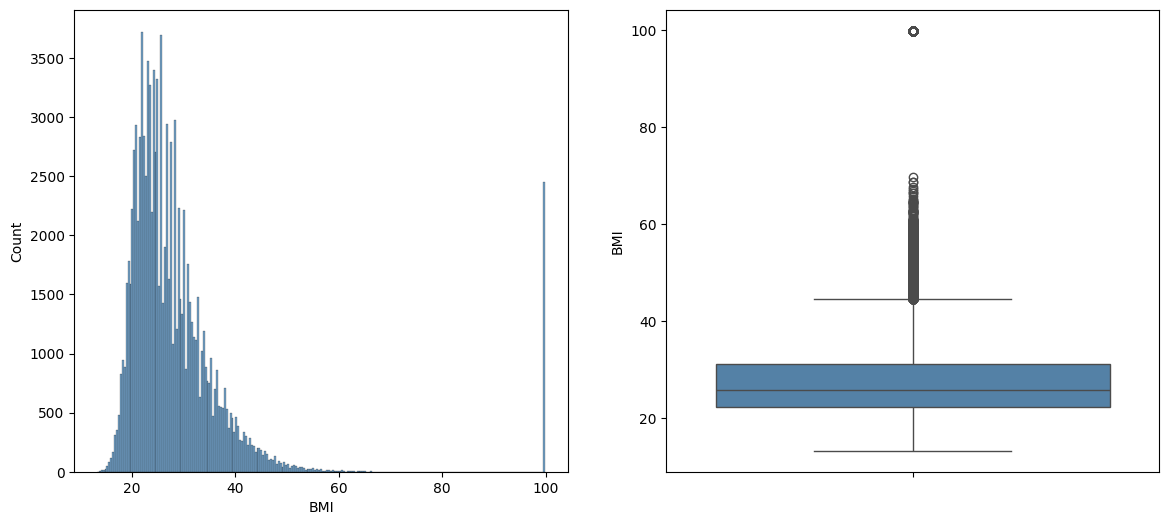

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (14, 6))

sns.histplot(ax = axes[0], data = train_data, x = 'BMI', color = 'steelblue');
sns.boxplot(ax = axes[1], data = train_data, y = 'BMI', color = 'steelblue');

The distribution of BMI is right skewed. Values 99.9 represent missing values. They will be imputed with the median.

In [ ]:
median_bmi = train_data['BMI'].loc[train_data['BMI'] < 99].median()
median_bmi

25.7

In [ ]:
train_data['BMI'] = train_data['BMI'].apply(lambda x: median_bmi if x > 99 else x)

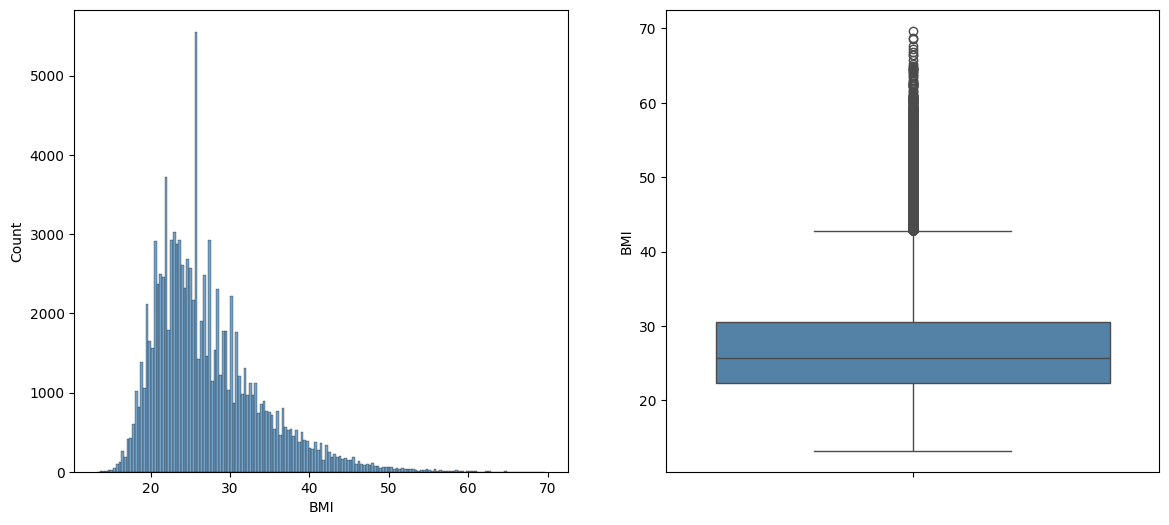

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (14, 6))

sns.histplot(ax = axes[0], data = train_data, x = 'BMI', color = 'steelblue');
sns.boxplot(ax = axes[1], data = train_data, y = 'BMI', color = 'steelblue');

## CIG_0

CIG_0 - Cigarettes Before Pregnancy

0-97
98
99
Number of cigarettes daily
98 or more cigarettes daily
Unknown or not stated

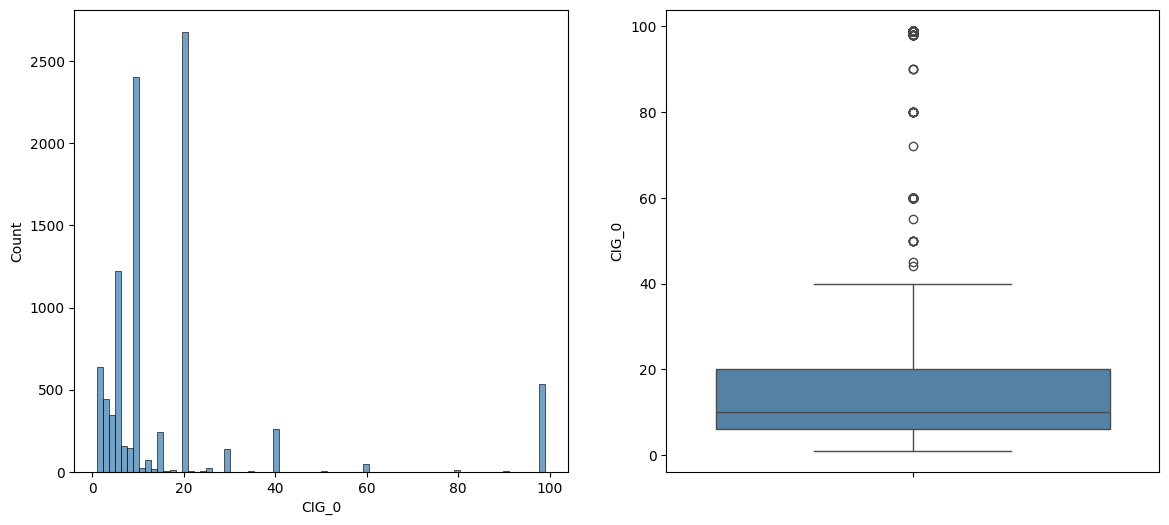

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (14, 6))

sns.histplot(ax = axes[0], data = train_data.loc[train_data.CIG_0 != 0], x = 'CIG_0', color = 'steelblue');
sns.boxplot(ax = axes[1], data = train_data.loc[train_data.CIG_0 != 0], y = 'CIG_0', color = 'steelblue');

In [ ]:
train_data['DBWT'].loc[((train_data['CIG_0'] == 0) | (train_data['CIG_0'] >90))].mean()

3272.3536589055047

In [ ]:
train_data['DBWT'].loc[train_data['CIG_0'] != 0].mean()

3123.547994496772

In [ ]:
train_data['DBWT'].loc[train_data['CIG_0'] > 90].mean()

3117.240671641791

In [ ]:
train_data['CIG_0'] = train_data['CIG_0'].apply(lambda x: 0 if x > 90 else x)
test_data['CIG_0'] = test_data['CIG_0'].apply(lambda x: 0 if x > 90 else x)
#assuming no data means no smoking

## DLMP_MM - last normal mens month


In [ ]:
train_data['DLMP_MM'].value_counts()

12    9377
10    8973
11    8959
8     8630
5     8614
9     8611
1     8605
3     8494
6     8338
4     8243
7     8229
2     7934
99    5075
Name: DLMP_MM, dtype: int64

In [ ]:
#month is a categorical variable, cyclical in nature
#code it back to categorical

train_data['DLMP_MM'] = train_data['DLMP_MM'].astype('category')

<Axes: xlabel='DLMP_MM', ylabel='DBWT'>

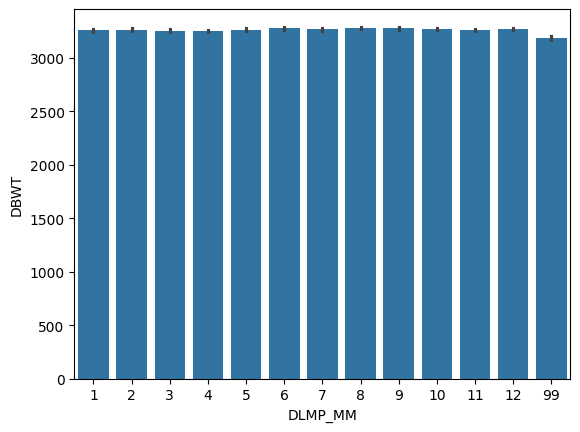

In [ ]:
sns.barplot(x=train_data['DLMP_MM'],y=train_data['DBWT'], data=train_data)

In [ ]:
train_data.drop('DLMP_MM',axis=1,inplace=True)
test_data.drop('DLMP_MM',axis=1,inplace=True)

## DMAR - marital status

In [ ]:
train_data['DMAR'].value_counts()

1    56906
2    37914
     13262
Name: DMAR, dtype: int64

<Axes: xlabel='DMAR', ylabel='DBWT'>

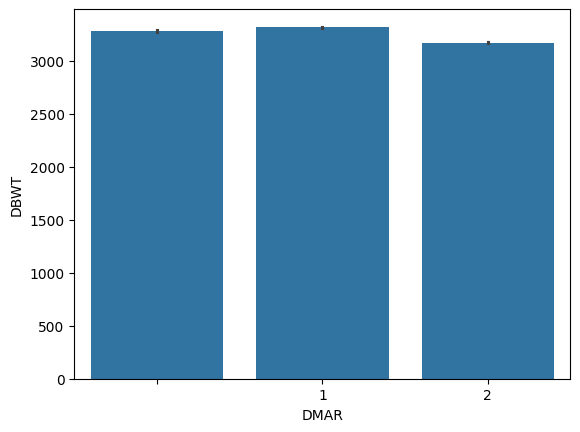

In [ ]:
sns.barplot(x=train_data['DMAR'],y=train_data['DBWT'], data=train_data)

In [ ]:
train_data['DMAR'] = train_data['DMAR'].astype('category')
test_data['DMAR'] = test_data['DMAR'].astype('category')
#code back in the category data type

In [ ]:
# taken from here: https://www.kaggle.com/code/paddykb/lgbm-mapie-birth-weight-oh-my
def fe(df):
    # calculaute approximate term of pregnancy
    # encode unknown as 0:
    df['approx_term'] = np.where(df['DLMP_MM'] != 99, df['DOB_MM'] - df['DLMP_MM'], 0)
    df['approx_term'] = np.where(df['approx_term'] < 0, df['approx_term'] + 12, df['approx_term'])


fe(train_data)
fe(test_data)

In [ ]:
train_data['approx_term'].value_counts()

9     70815
10    14645
8     14066
0      5198
7      1639
6       642
11      631
5       226
1        65
4        61
3        50
2        44
Name: approx_term, dtype: int64

In [ ]:
train_data[['approx_term', 'DLMP_MM', 'DOB_MM']].loc[train_data['approx_term'] == 2]

,approx_term,DLMP_MM,DOB_MM
907,2,1,3
2335,2,1,3
6491,2,12,2
10420,2,9,11
15956,2,3,5
16022,2,11,1
18544,2,4,6
19147,2,12,2
20169,2,2,4
20514,2,6,8


<Axes: xlabel='approx_term', ylabel='DBWT'>

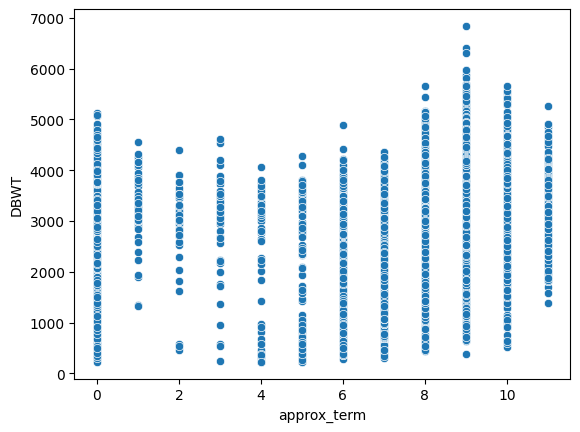

In [ ]:
sns.scatterplot(x=train_data['approx_term'],y=train_data['DBWT'], data=train_data)

## DOB_MM - birth month

8     9783
7     9512
10    9385
5     9156
9     9143
12    9061
3     8944
6     8926
1     8872
11    8662
4     8437
2     8201
Name: DOB_MM, dtype: int64

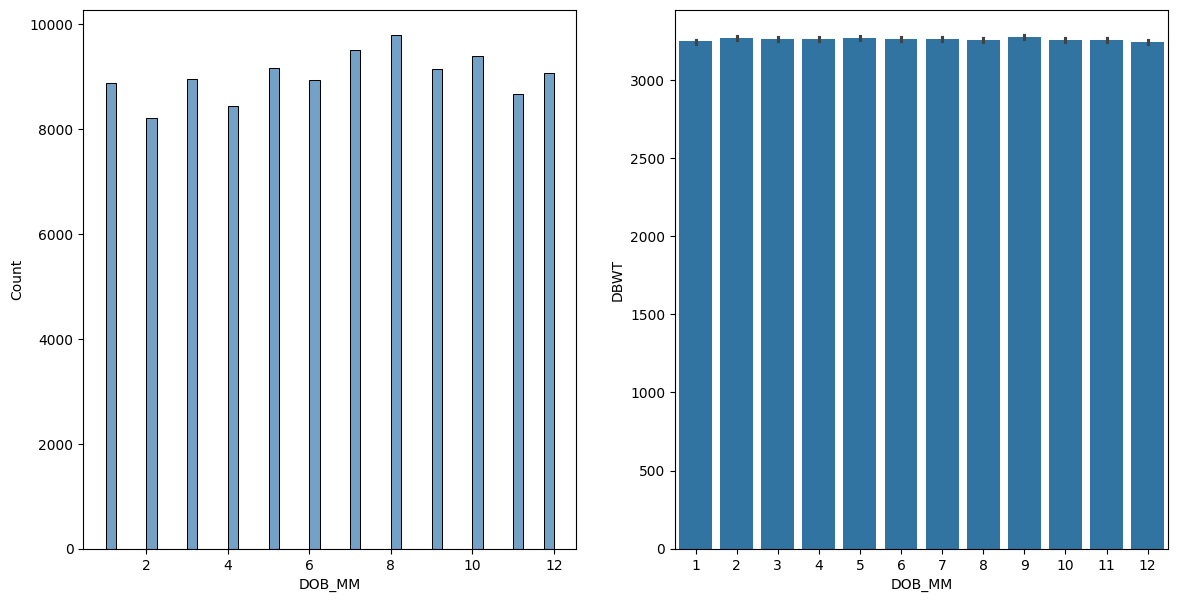

In [ ]:
show_cat_feature("DOB_MM")

In [ ]:
# train_data.drop('DOB_MM',axis=1,inplace=True)
# test_data.drop('DOB_MM',axis=1,inplace=True)

## DOB_TT - time of birth

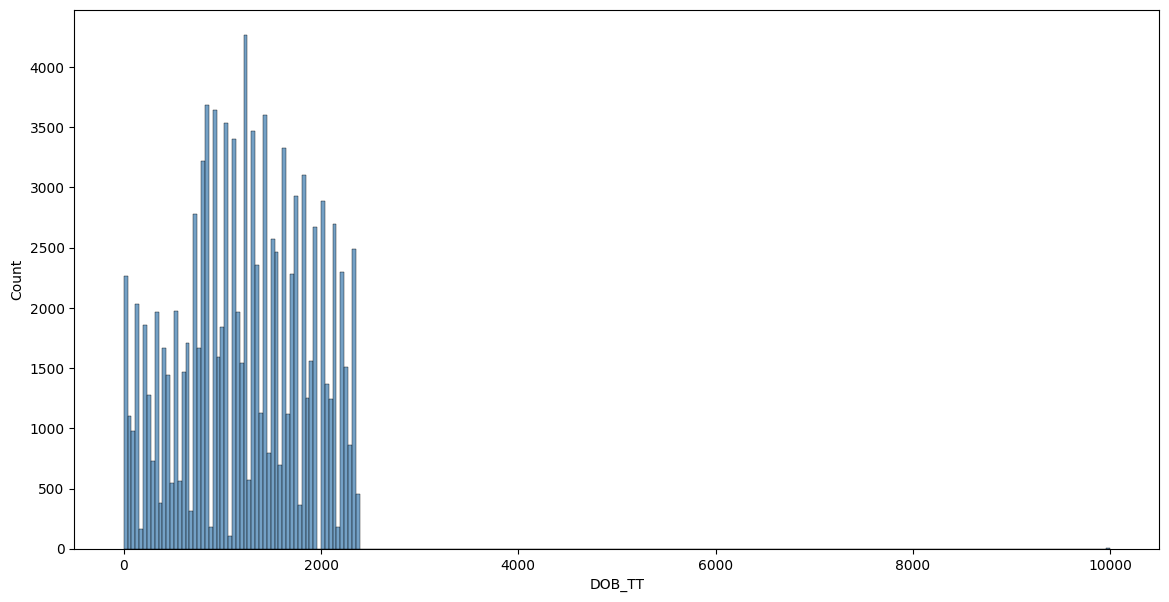

In [ ]:
plt.figure(figsize = (14, 7))
sns.histplot(data = train_data, x = "DOB_TT", color = 'steelblue')
plt.show()


In [ ]:
train_data.drop('DOB_TT',axis=1,inplace=True)
test_data.drop('DOB_TT',axis=1,inplace=True)

## DOB_WK - birth day of week

6    17385
4    17296
3    17237
5    17171
2    16519
7    11953
1    10521
Name: DOB_WK, dtype: int64

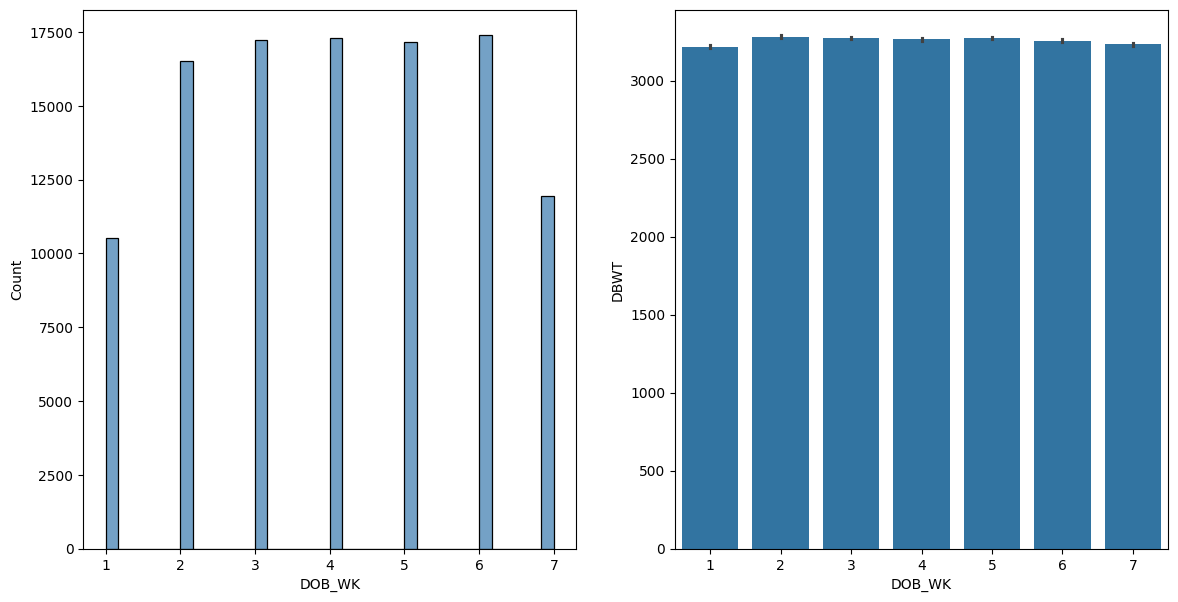

In [ ]:
show_cat_feature("DOB_WK")

It looks like on the weekends tends to have less deliveries and lower BW

In [ ]:
train_data['DOB_WK'] = train_data['DOB_WK'].astype('category')
test_data['DOB_WK'] = test_data['DOB_WK'].astype('category')
#code back in the category data type

## FAGECOMB - fathers combined age

<Axes: xlabel='FAGECOMB', ylabel='Count'>

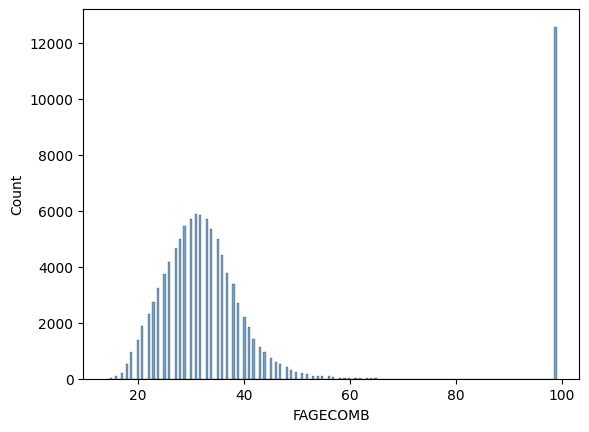

In [ ]:
sns.histplot(data = train_data, x = "FAGECOMB", color = 'steelblue')

In [ ]:
FAGECOMB_median = train_data['FAGECOMB'].loc[train_data['FAGECOMB'] <90].median()
FAGECOMB_median

31.0

In [ ]:
train_data['FAGECOMB'] = train_data['FAGECOMB'].apply(lambda x: FAGECOMB_median if x > 90 else x)
test_data['FAGECOMB'] = test_data['FAGECOMB'].apply(lambda x: FAGECOMB_median if x > 90 else x)
#assuming median age of parents

<Axes: xlabel='FAGECOMB', ylabel='DBWT'>

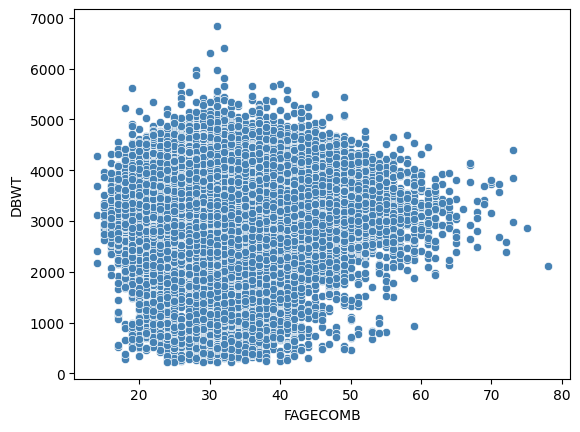

In [ ]:
sns.scatterplot(x = "FAGECOMB", y = "DBWT", data = train_data, color = 'steelblue')

## FEDUC

FEDUC - education
1 8th grade or less
2 9th through 12th grade with no diploma
3 High school graduate or GED completed
4 Some college credit, but not a degree.
5 Associate degree (AA,AS)
6 Bachelor’s degree (BA, AB, BS)
7 Master’s degree (MA, MS, MEng, MEd, MSW, MBA)
8 Doctorate (PhD, EdD) or Professional Degree (MD, DDS,
DVM, LLB, JD)
9 Unknown

3    28355
6    18755
4    17289
9    14856
2     8310
7     7198
5     6669
1     3427
8     3223
Name: FEDUC, dtype: int64

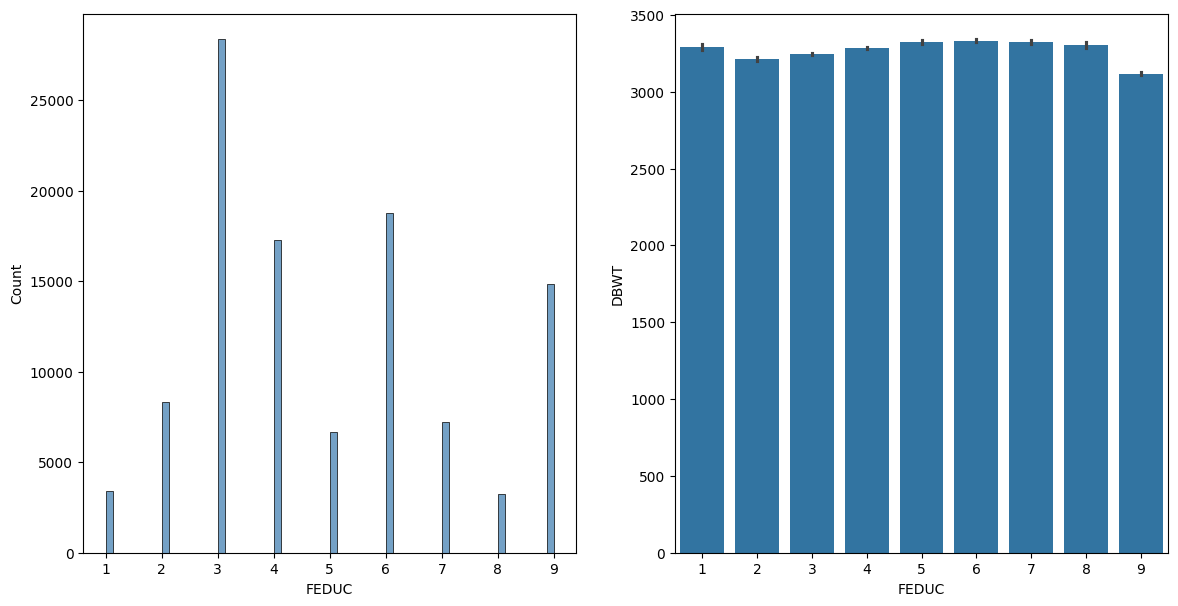

In [ ]:
show_cat_feature("FEDUC")

In [ ]:
train_data['FEDUC'] = train_data['FEDUC'].astype('category')
test_data['FEDUC'] = test_data['FEDUC'].astype('category')
#code back in the category data type

## ILLB_R

ILLB_R - Interval Since Last Live Birth Recode

000-003 Plural delivery
004-300 Months since last live birth
888 Not applicable / 1st live birth
999 Unknown or not stated

We se a mix of categorical and numerical information
Let's look is there any correlation between month of last live birth and BW

<Axes: xlabel='ILLB_R', ylabel='DBWT'>

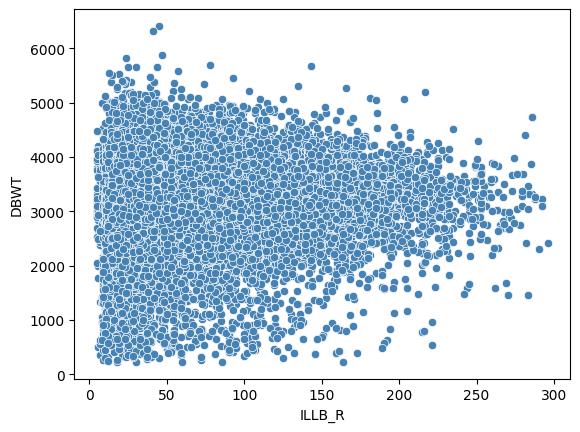

In [ ]:
sns.scatterplot(x = "ILLB_R", y = "DBWT", data = train_data.loc[((train_data.ILLB_R > 4) & (train_data.ILLB_R < 300))], color = 'steelblue')


In [ ]:
train_data['DBWT'].loc[((train_data.ILLB_R > 3) & (train_data.ILLB_R < 300))].mean()

3309.522590989258

In [ ]:
train_data['DBWT'].loc[((train_data.ILLB_R > 300) & (train_data.ILLB_R < 990))].mean()

3220.174916117656

In [ ]:
train_data['DBWT'].loc[train_data.ILLB_R > 300].mean()

3220.928403596765

In [ ]:
train_data['DBWT'].loc[train_data.ILLB_R < 4].mean()

2327.584316446912

There are some meaning to convert feature to categoric variable

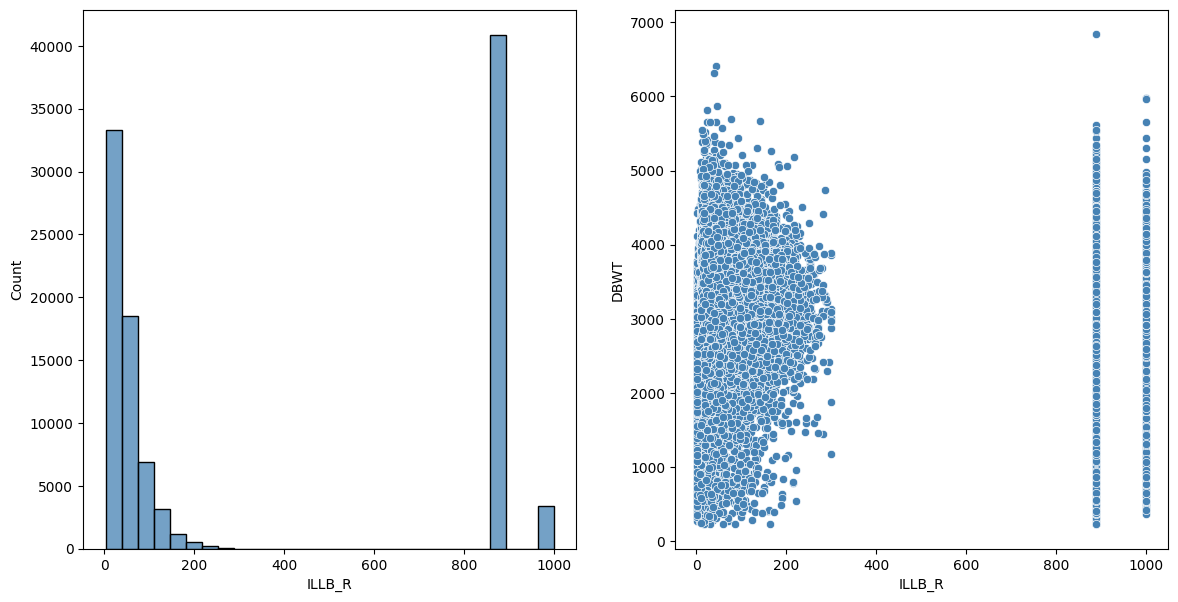

In [ ]:
show_num_feature("ILLB_R")

In [ ]:
train_data.drop('ILLB_R',axis=1,inplace=True)
test_data.drop('ILLB_R',axis=1,inplace=True)

## ILOP_R

ILOP_R - Interval Since Last Other Pregnancy Recode

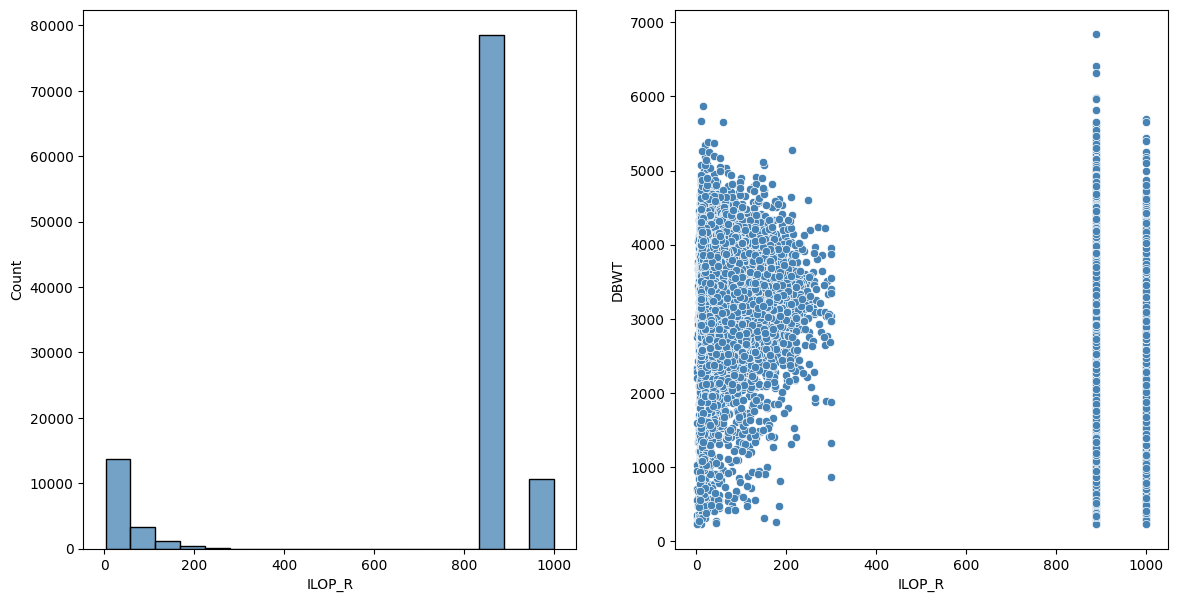

In [ ]:
show_num_feature("ILOP_R")

In [ ]:
train_data['DBWT'].loc[((train_data.ILOP_R > 300) & (train_data.ILOP_R < 990))].mean()

3268.463726377225

In [ ]:
train_data.drop('ILOP_R',axis=1,inplace=True)
test_data.drop('ILOP_R',axis=1,inplace=True)

## LD_INDL - Induction of Labor

N    78763
Y    29319
Name: LD_INDL, dtype: int64

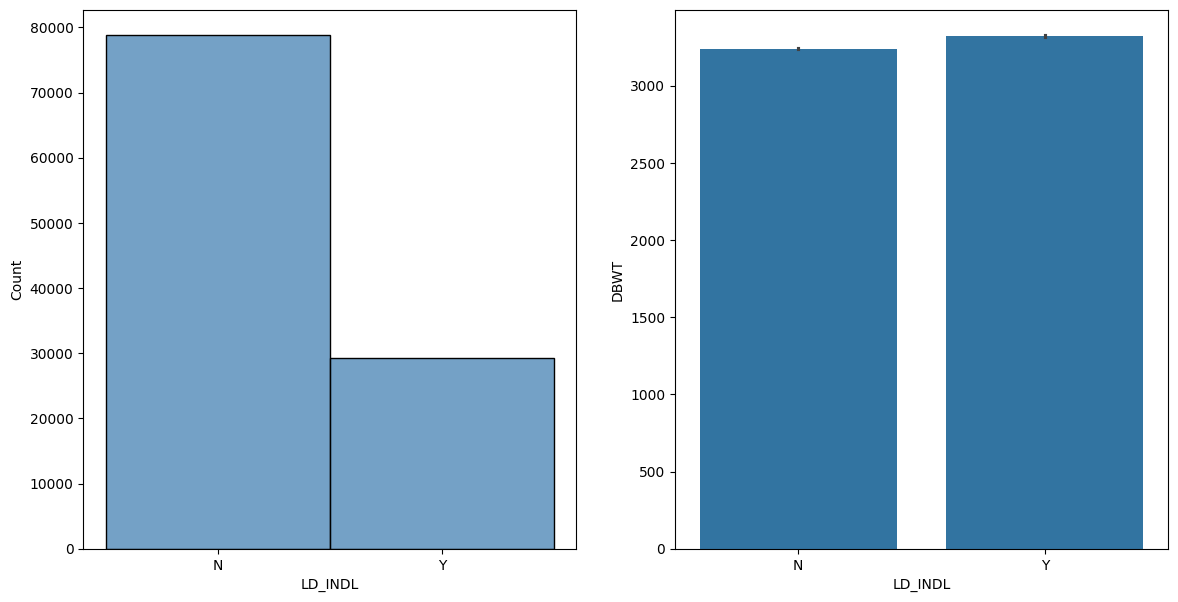

In [ ]:
show_cat_feature("LD_INDL")

## MAGER - Mother’s Single Years of Age

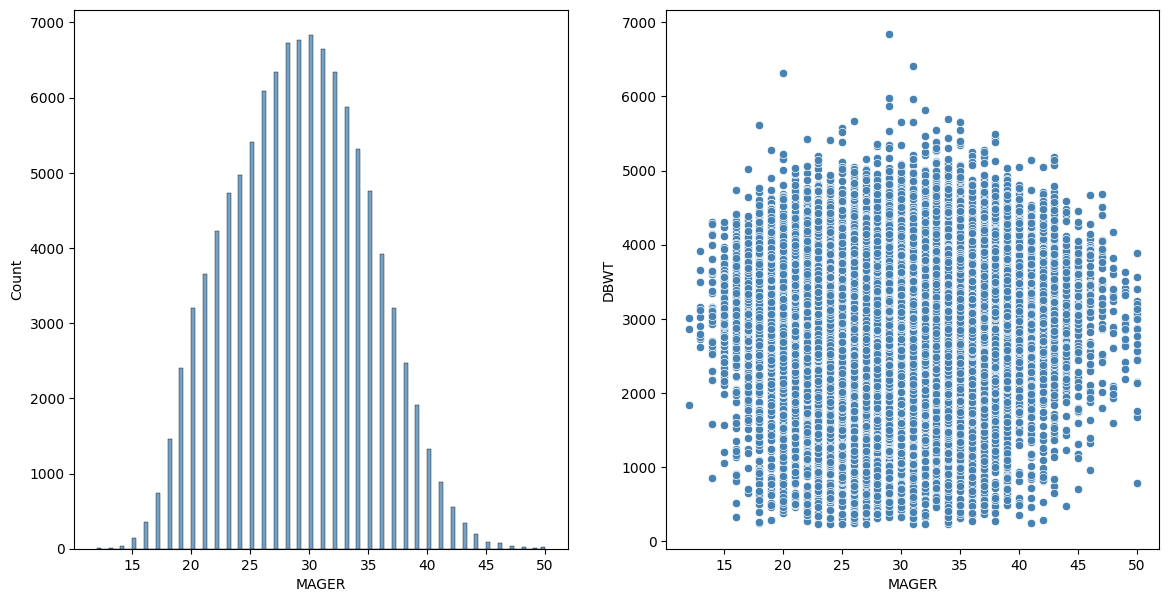

In [ ]:
show_num_feature('MAGER')

## MBSTATE_REC - Mother’s Nativity

1    83298
2    24573
3      211
Name: MBSTATE_REC, dtype: int64

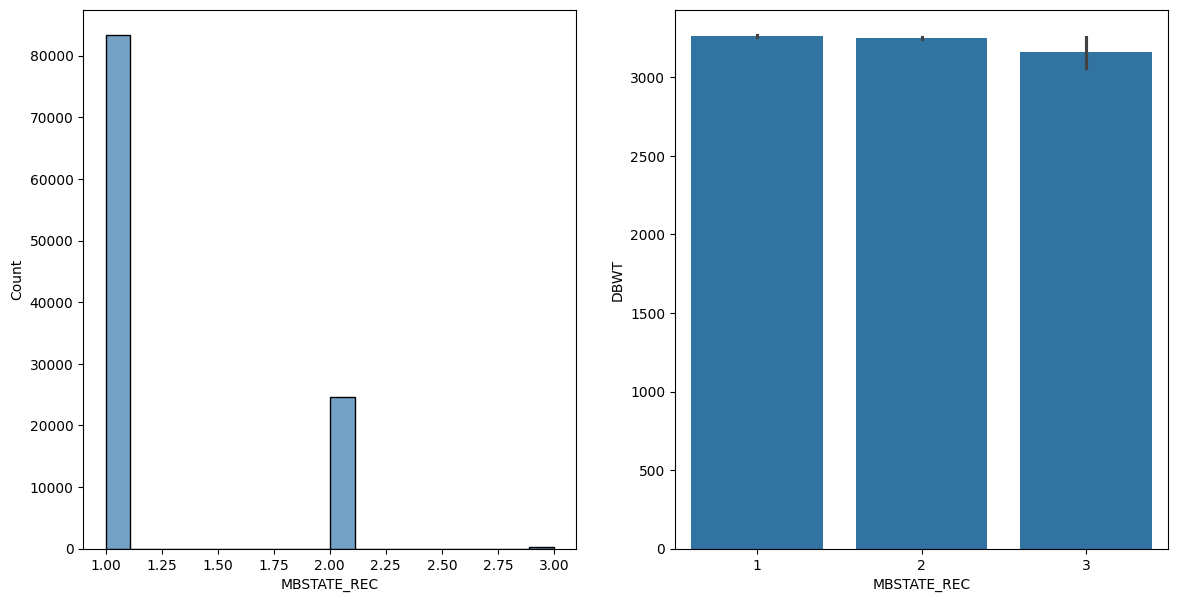

In [ ]:
show_cat_feature("MBSTATE_REC")

In [ ]:
train_data['MBSTATE_REC'] = train_data['MBSTATE_REC'].astype('category')
test_data['MBSTATE_REC'] = test_data['MBSTATE_REC'].astype('category')

## MEDUC - Mother’s Education

3    27683
6    22384
4    21438
7    10190
2    10109
5     8749
1     3200
8     2888
9     1441
Name: MEDUC, dtype: int64

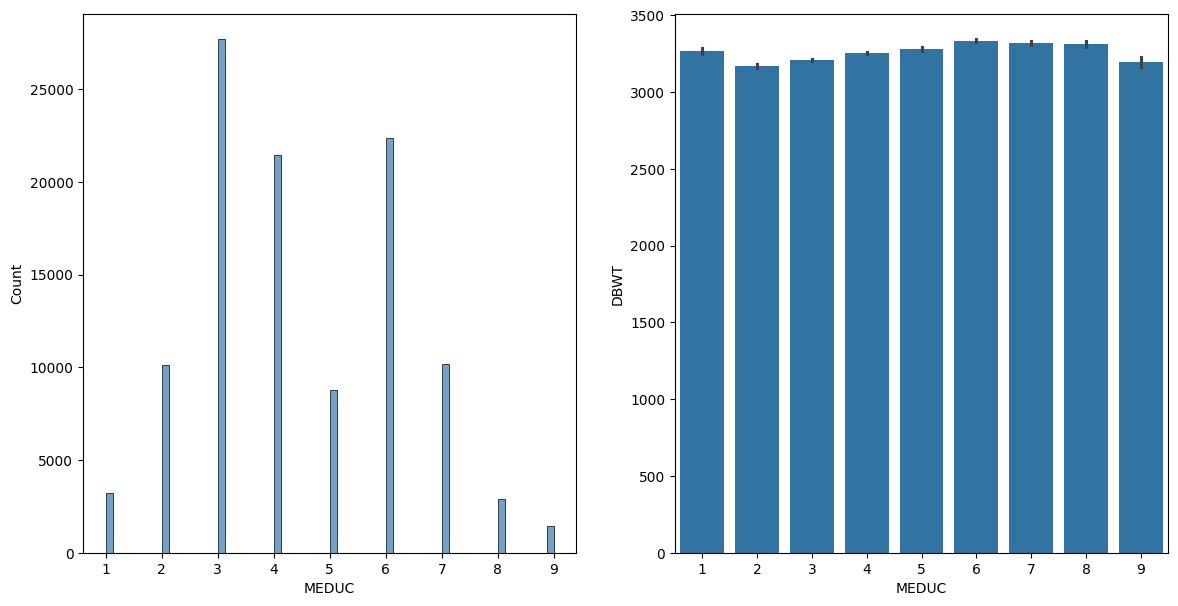

In [ ]:
show_cat_feature("MEDUC")

In [ ]:
train_data['MEDUC'] = train_data['MEDUC'].astype('category')
test_data['MEDUC'] = test_data['MEDUC'].astype('category')

## M_Ht_In - Mother’s Height in Total Inches

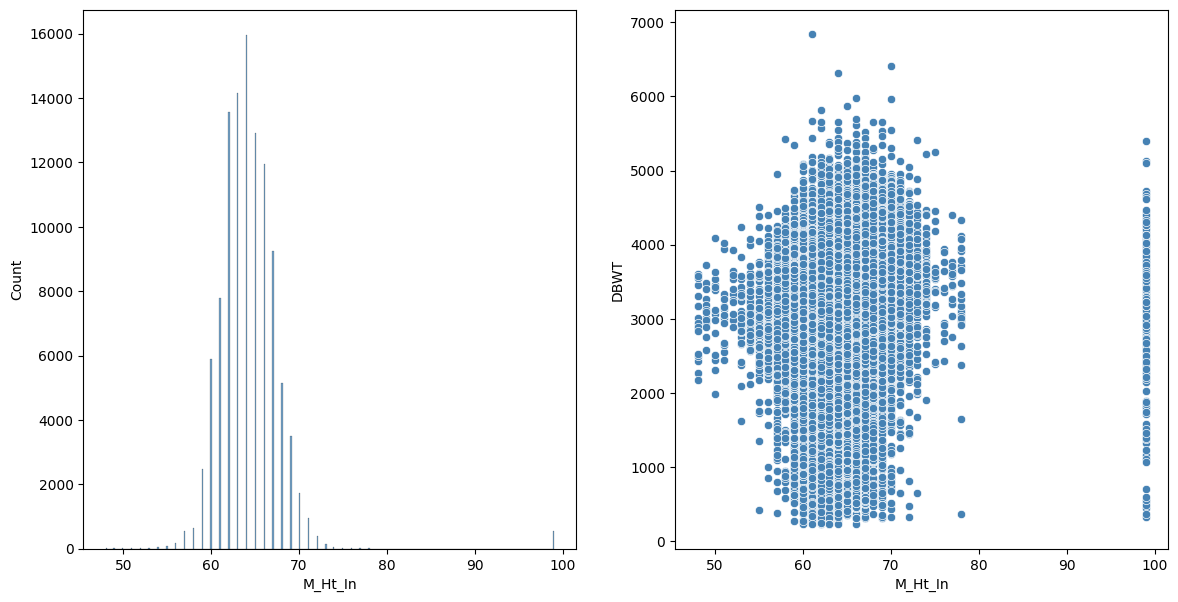

In [ ]:
show_num_feature('M_Ht_In')

In [ ]:
convert_to_median('M_Ht_In')

## NO_INFEC - No Infections Reported

1    104902
0      2978
9       202
Name: NO_INFEC, dtype: int64

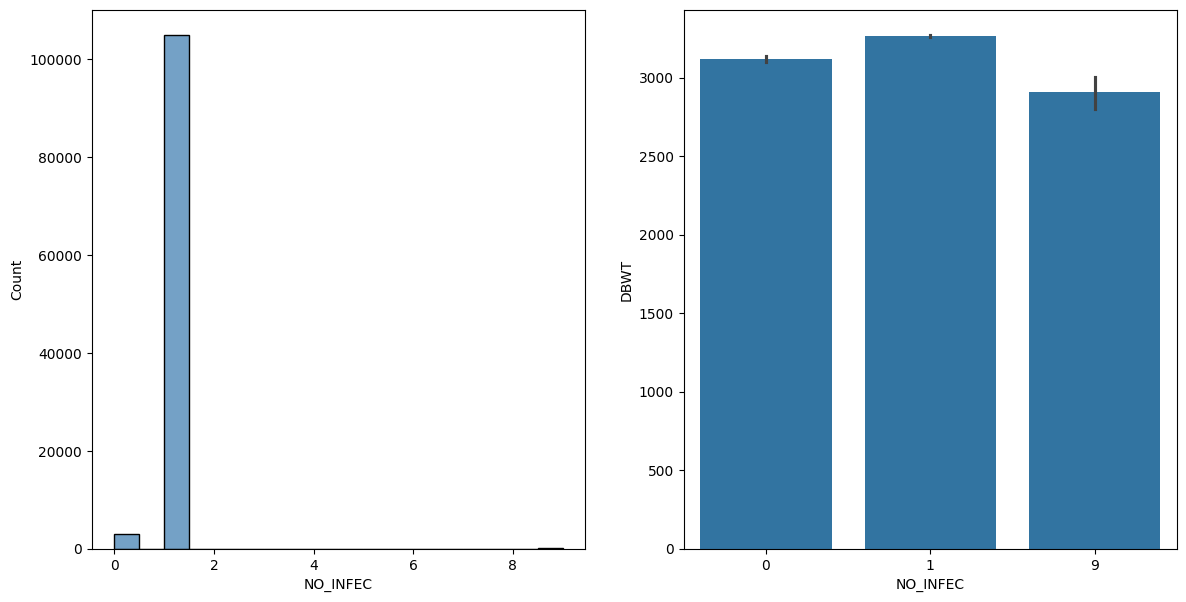

In [ ]:
show_cat_feature("NO_INFEC")

In [ ]:
train_data['NO_INFEC'] = train_data['NO_INFEC'].apply(lambda x: 1 if x == 9 else x)
test_data['NO_INFEC'] = test_data['NO_INFEC'].apply(lambda x: 1 if x == 9 else x)

In [ ]:
train_data['NO_INFEC'] = train_data['NO_INFEC'].astype('category')
test_data['NO_INFEC'] = test_data['NO_INFEC'].astype('category')

##NO_MMORB - No Maternal Morbidity Reported

1    106552
0      1471
9        59
Name: NO_MMORB, dtype: int64

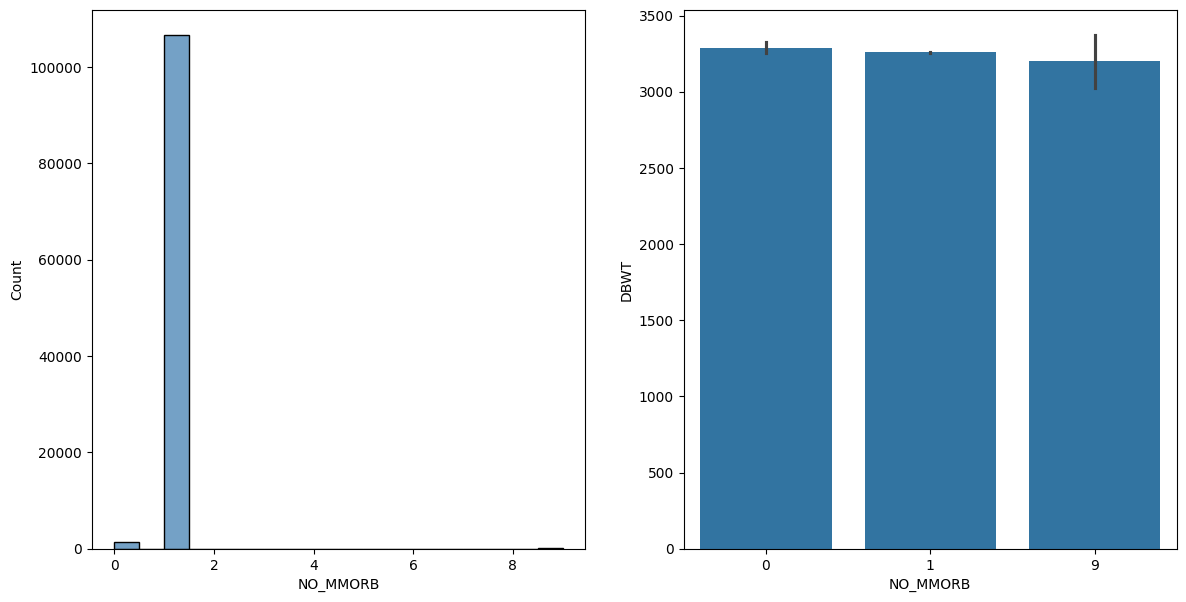

In [ ]:
show_cat_feature("NO_MMORB")

In [ ]:
train_data['NO_MMORB'] = train_data['NO_MMORB'].apply(lambda x: 1 if x == 9 else x)
test_data['NO_MMORB'] = test_data['NO_MMORB'].apply(lambda x: 1 if x == 9 else x)

In [ ]:
train_data['NO_MMORB'] = train_data['NO_MMORB'].astype('category')
test_data['NO_MMORB'] = test_data['NO_MMORB'].astype('category')


## NO_RISKS - No Risk Factors Reported

1    74096
0    33986
Name: NO_RISKS, dtype: int64

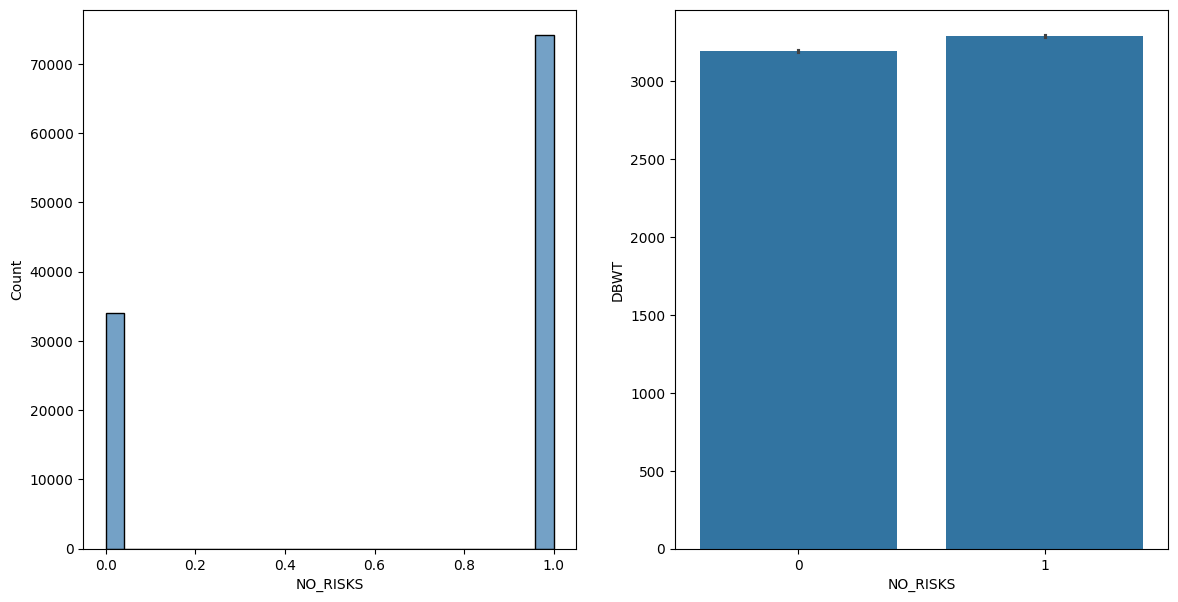

In [ ]:
show_cat_feature("NO_RISKS")

In [ ]:
train_data['NO_RISKS'] = train_data['NO_RISKS'].astype('category')
test_data['NO_RISKS'] = test_data['NO_RISKS'].astype('category')

## PAY - Payment Source for Delivery

2    53068
1    45521
3     4681
8     1985
5     1349
6      779
9      622
4       77
Name: PAY, dtype: int64

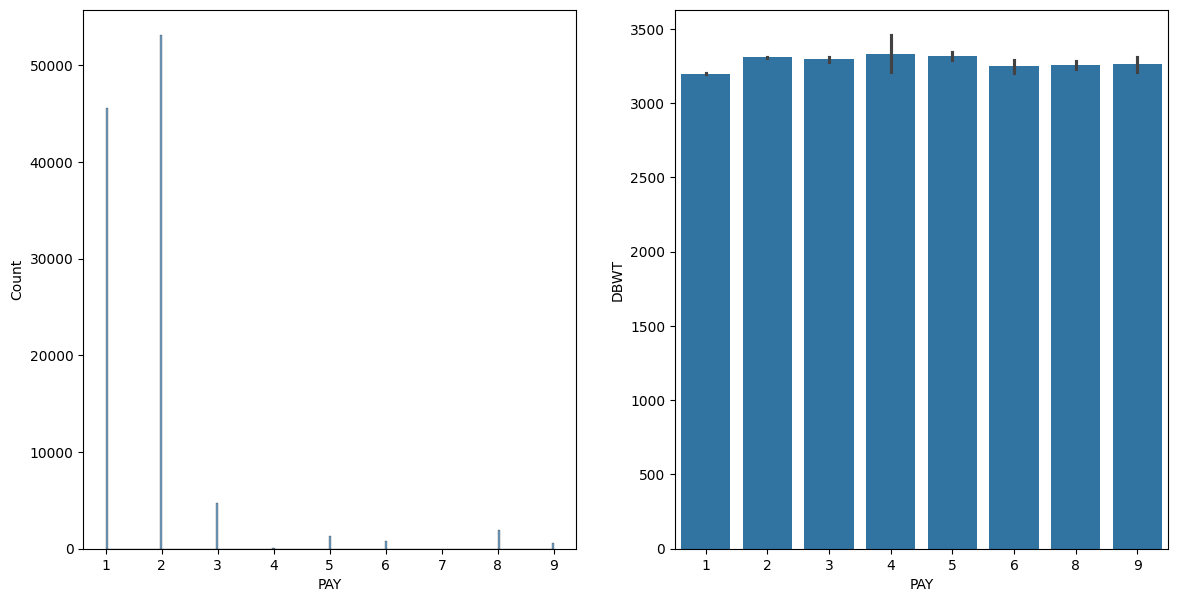

In [ ]:
show_cat_feature("PAY")

In [ ]:
# train_data['PAY'] = train_data['PAY'].astype('category')
# test_data['PAY'] = test_data['PAY'].astype('category')


In [ ]:
#delete this feature as it carries the same information as the next feature
train_data.drop('PAY',axis=1,inplace=True)
test_data.drop('PAY',axis=1,inplace=True)

## PAY_REC - Payment Recode

2    53068
1    45521
3     4681
4     4190
9      622
Name: PAY_REC, dtype: int64

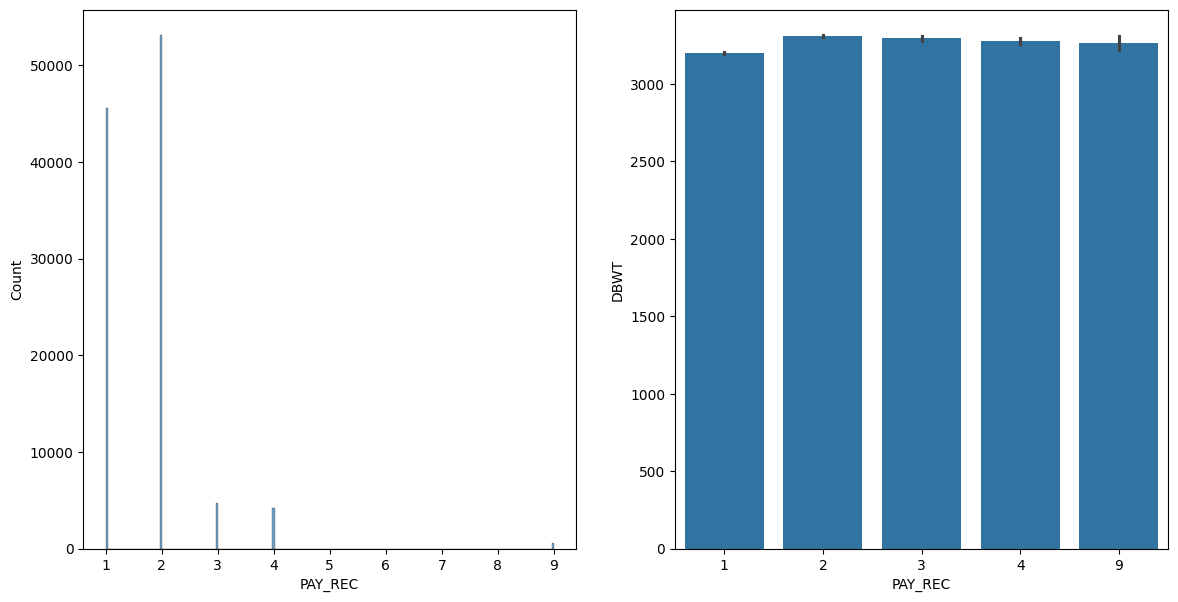

In [ ]:
show_cat_feature("PAY_REC")

In [ ]:
train_data['PAY_REC'] = train_data['PAY_REC'].astype('category')
test_data['PAY_REC'] = test_data['PAY_REC'].astype('category')

## PRECARE - Month Prenatal Care Began

2     42599
3     32734
4      9491
1      6262
5      4773
6      2969
99     2668
7      2282
0      1808
8      1772
9       712
10       12
Name: PRECARE, dtype: int64

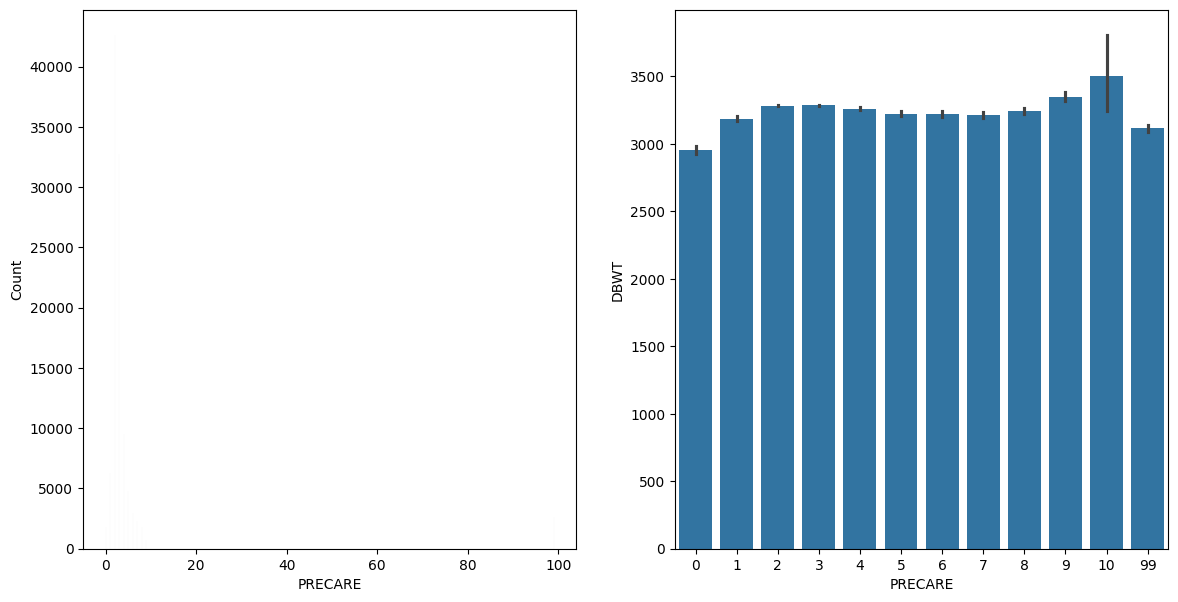

In [ ]:
show_cat_feature("PRECARE")

In [ ]:
train_data['PRECARE'] = train_data['PRECARE'].astype('category')
test_data['PRECARE'] = test_data['PRECARE'].astype('category')

## `PREVIS` - Number of Prenatal Visits

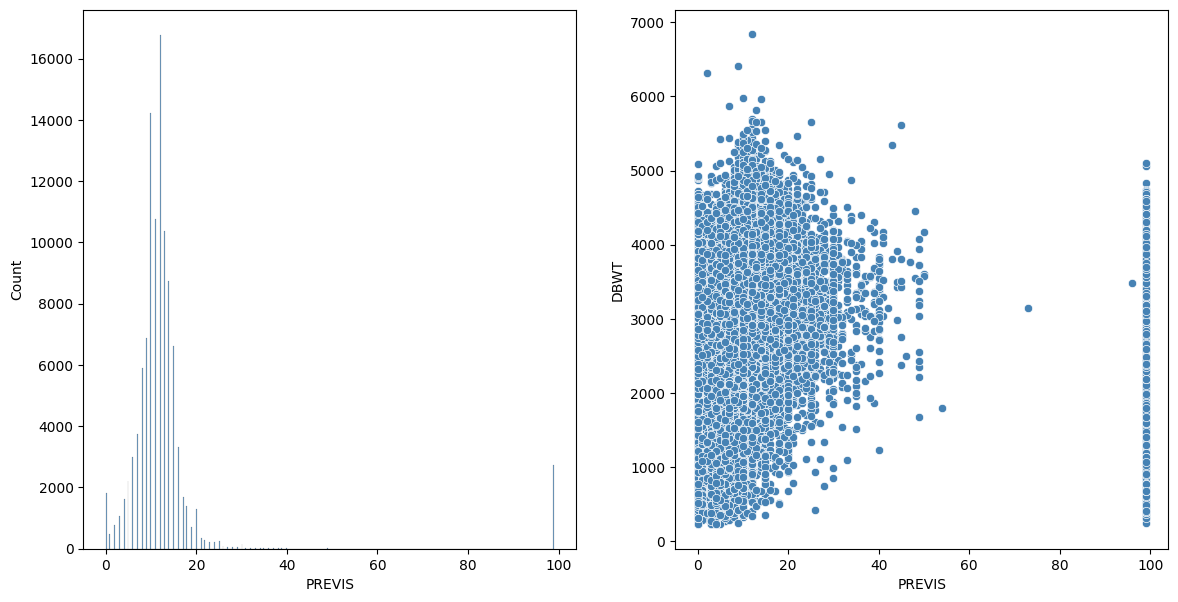

In [ ]:
show_num_feature('PREVIS')

In [ ]:
convert_to_median('PREVIS')

## PRIORDEAD - Prior Births Now Dead

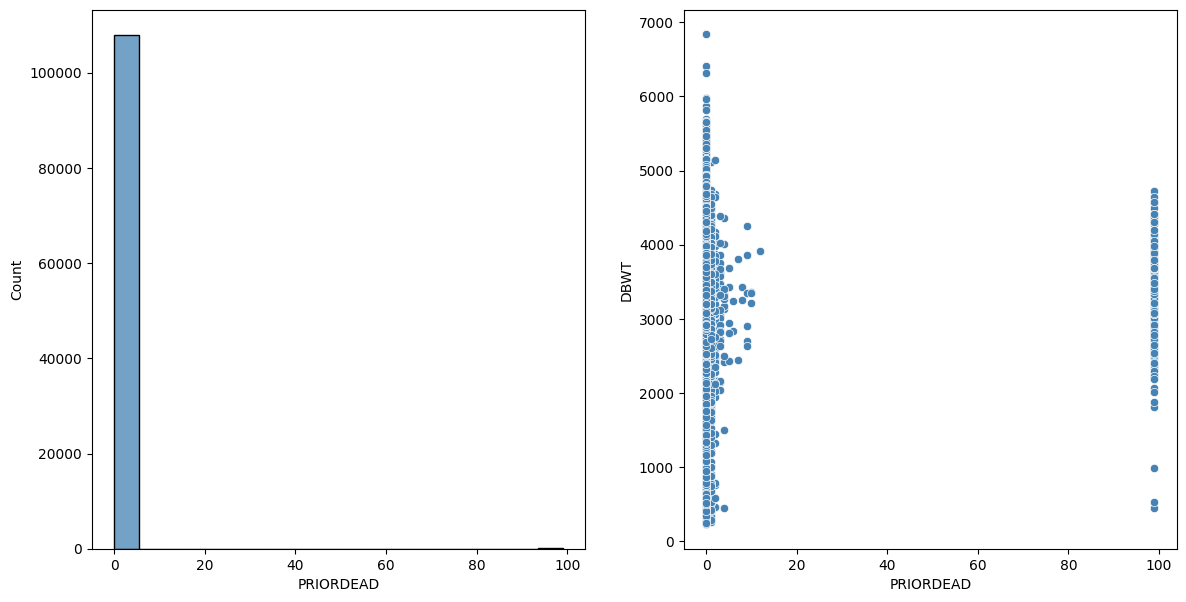

In [ ]:
show_num_feature('PRIORDEAD')

In [ ]:
train_data['PRIORDEAD'].value_counts()

0     106591
1       1068
99       242
2        112
3         34
4         13
9          6
5          6
10         3
8          2
6          2
7          2
12         1
Name: PRIORDEAD, dtype: int64

In [ ]:
convert_to_median('PRIORDEAD')

In [ ]:
train_data['PRIORDEAD'] = train_data['PRIORDEAD'].apply(lambda x: 2 if x > 2 else x)
test_data['PRIORDEAD'] = test_data['PRIORDEAD'].apply(lambda x: 2 if x > 2 else x)

In [ ]:
train_data['PRIORDEAD'] = train_data['PRIORDEAD'].astype('category')
test_data['PRIORDEAD'] = test_data['PRIORDEAD'].astype('category')

## PRIORLIVE - Prior Births Now Living

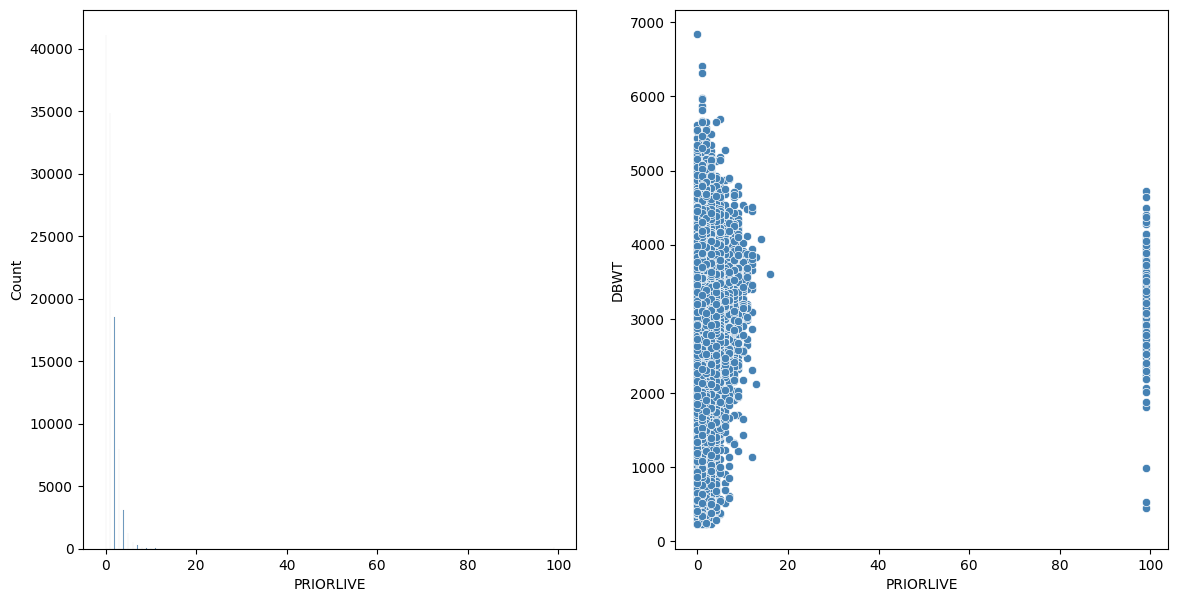

In [ ]:
show_num_feature('PRIORLIVE')

In [ ]:
train_data['PRIORLIVE'].value_counts()

0     41055
1     34884
2     18516
3      7965
4      3115
5      1233
6       536
7       281
99      171
8       153
9        96
10       38
11       22
12       13
13        2
16        1
14        1
Name: PRIORLIVE, dtype: int64

In [ ]:
convert_to_median('PRIORLIVE')

In [ ]:
train_data['PRIORLIVE'] = train_data['PRIORLIVE'].apply(lambda x: 4 if x > 4 else x)
test_data['PRIORLIVE'] = test_data['PRIORLIVE'].apply(lambda x: 4 if x > 4 else x)

In [ ]:
train_data['PRIORLIVE'].value_counts()

0.0    41055
1.0    35055
2.0    18516
3.0     7965
4.0     5491
Name: PRIORLIVE, dtype: int64

In [ ]:
train_data['PRIORLIVE'] = train_data['PRIORLIVE'].astype('category')
test_data['PRIORLIVE'] = test_data['PRIORLIVE'].astype('category')

0.0    41055
1.0    35055
2.0    18516
3.0     7965
4.0     5491
Name: PRIORLIVE, dtype: int64

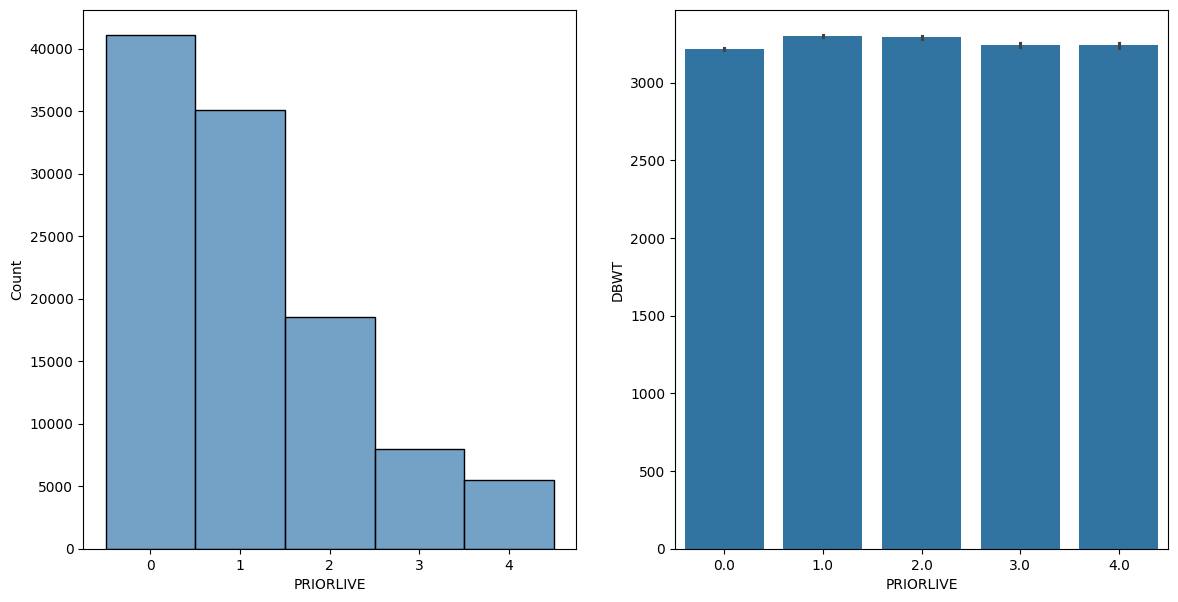

In [ ]:
show_cat_feature('PRIORLIVE')

## PRIORTERM - Prior Other Terminations

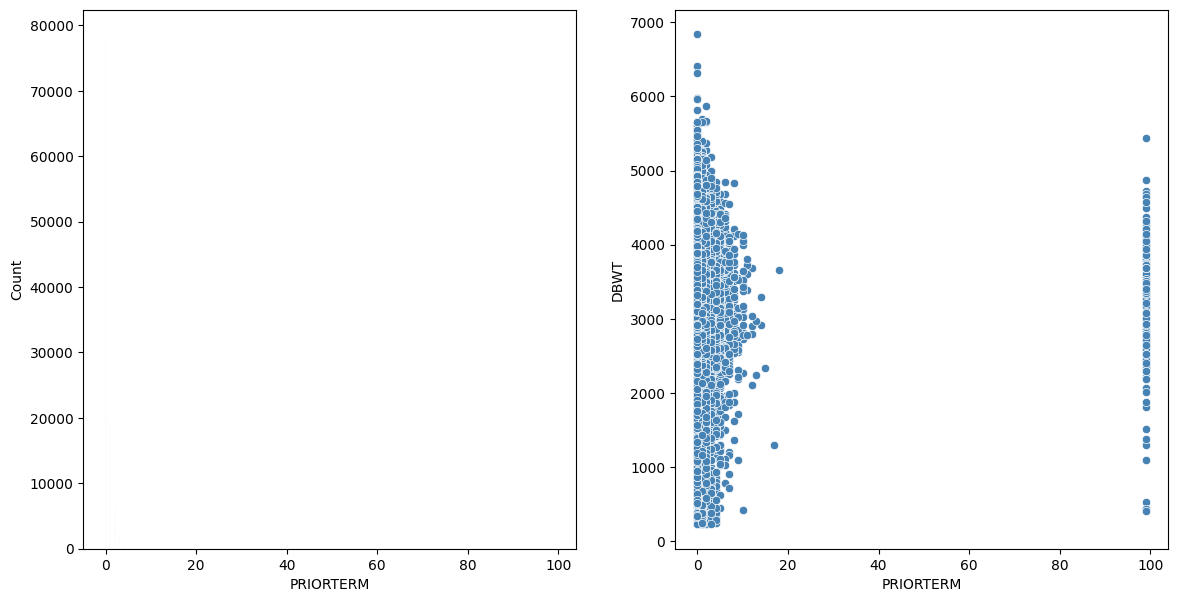

In [ ]:
show_num_feature('PRIORTERM')

In [ ]:
train_data['PRIORTERM'].value_counts()

0     78473
1     19170
2      6465
3      2192
4       793
5       334
99      324
6       150
7        84
8        41
9        20
10       19
11        5
12        5
13        2
14        2
18        1
17        1
15        1
Name: PRIORTERM, dtype: int64

In [ ]:
convert_to_median('PRIORTERM')

In [ ]:
train_data['PRIORTERM'] = train_data['PRIORTERM'].apply(lambda x: 5 if x > 5 else x)
test_data['PRIORTERM'] = test_data['PRIORTERM'].apply(lambda x: 5 if x > 5 else x)

In [ ]:
train_data['PRIORTERM'] = train_data['PRIORTERM'].astype('category')
test_data['PRIORTERM'] = test_data['PRIORTERM'].astype('category')

In [ ]:
train_data['PRIORTERM'].value_counts()

0.0    78797
1.0    19170
2.0     6465
3.0     2192
4.0      793
5.0      665
Name: PRIORTERM, dtype: int64

0.0    78797
1.0    19170
2.0     6465
3.0     2192
4.0      793
5.0      665
Name: PRIORTERM, dtype: int64

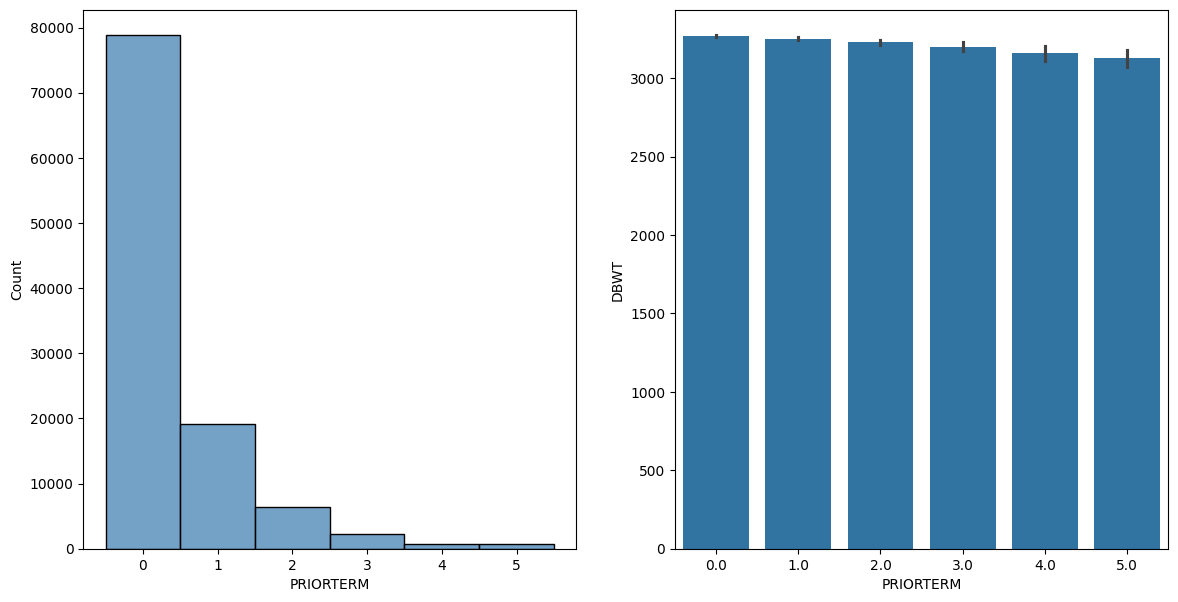

In [ ]:
show_cat_feature('PRIORTERM')

## PWgt_R - Pre-pregnancy Weight Recode

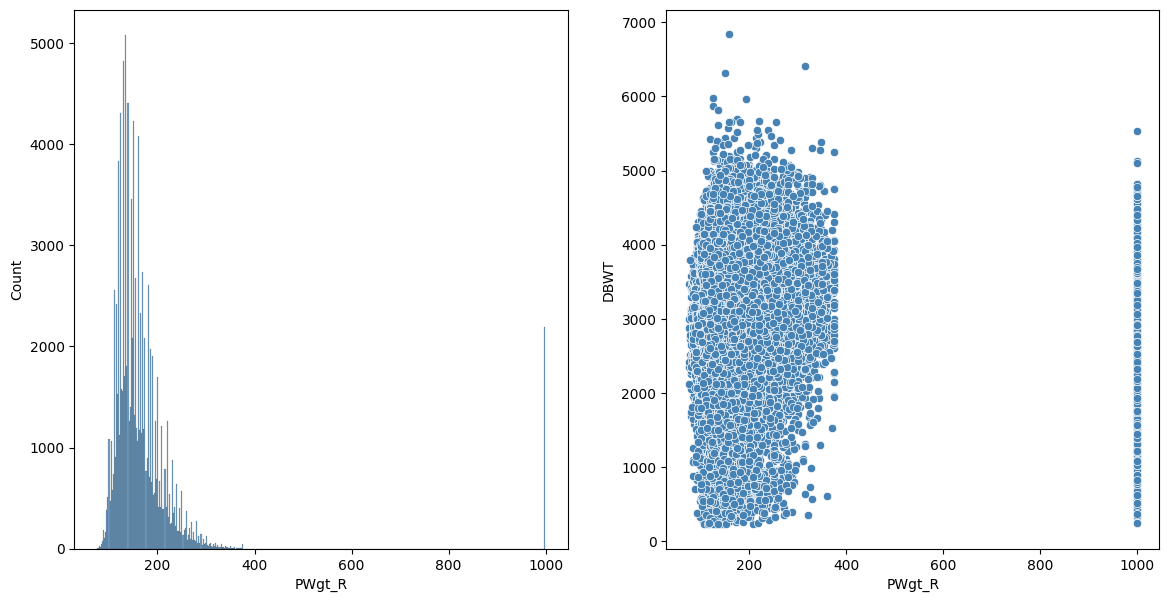

In [ ]:
show_num_feature('PWgt_R')

<Axes: xlabel='PWgt_R', ylabel='BMI'>

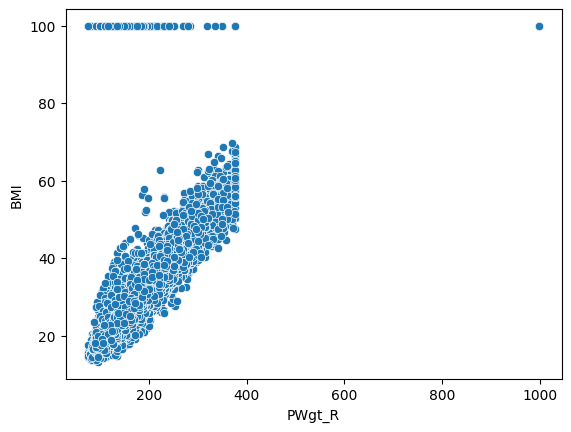

In [ ]:
sns.scatterplot(x = 'PWgt_R', y = 'BMI', data = train_data)
#as expected there is a positive hihgt correlation between BMI and PWgt_R, it make semce to left only one

In [ ]:
median_PWgt_R = train_data['PWgt_R'].loc[train_data['PWgt_R'] < 800].median()
median_PWgt_R

150.0

In [ ]:
train_data['PWgt_R'] = train_data['PWgt_R'].apply(lambda x: median_PWgt_R if x > 800 else x)

In [ ]:
train_data.drop('PWgt_R',axis=1,inplace=True)
test_data.drop('PWgt_R',axis=1,inplace=True)

## RDMETH_REC - Delivery Method *Recode*

1    71387
3    19631
4    14807
2     2233
9       24
Name: RDMETH_REC, dtype: int64

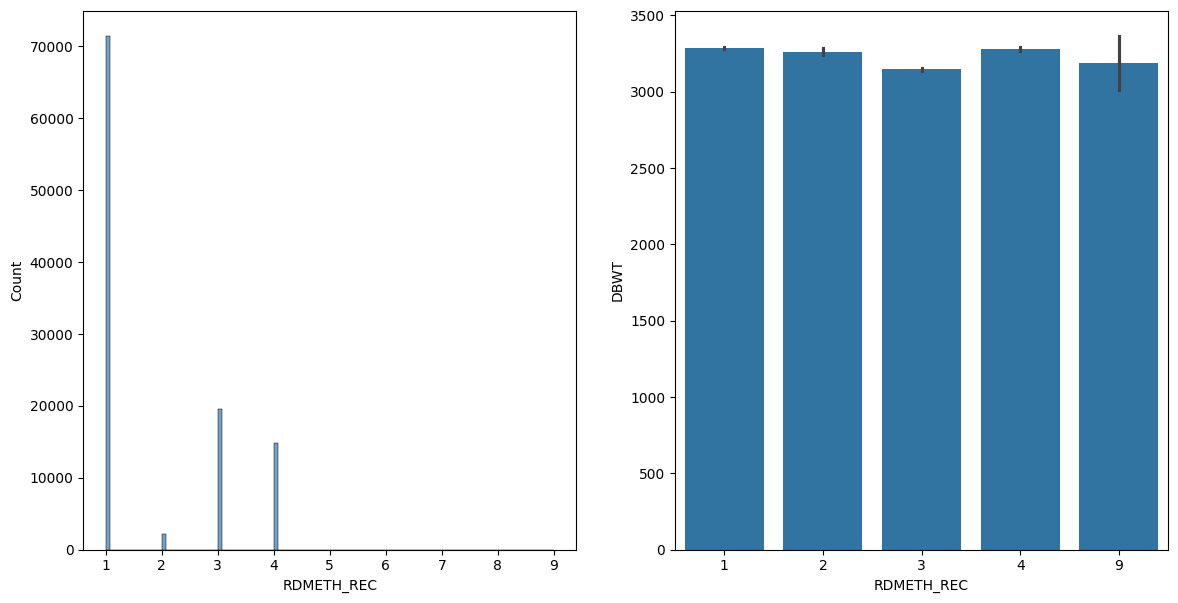

In [ ]:
show_cat_feature('RDMETH_REC')

In [ ]:
train_data['RDMETH_REC'] = train_data['RDMETH_REC'].astype('category')
test_data['RDMETH_REC'] = test_data['RDMETH_REC'].astype('category')

##RESTATUS - Residence Status

1    75344
2    29914
3     2548
4      276
Name: RESTATUS, dtype: int64

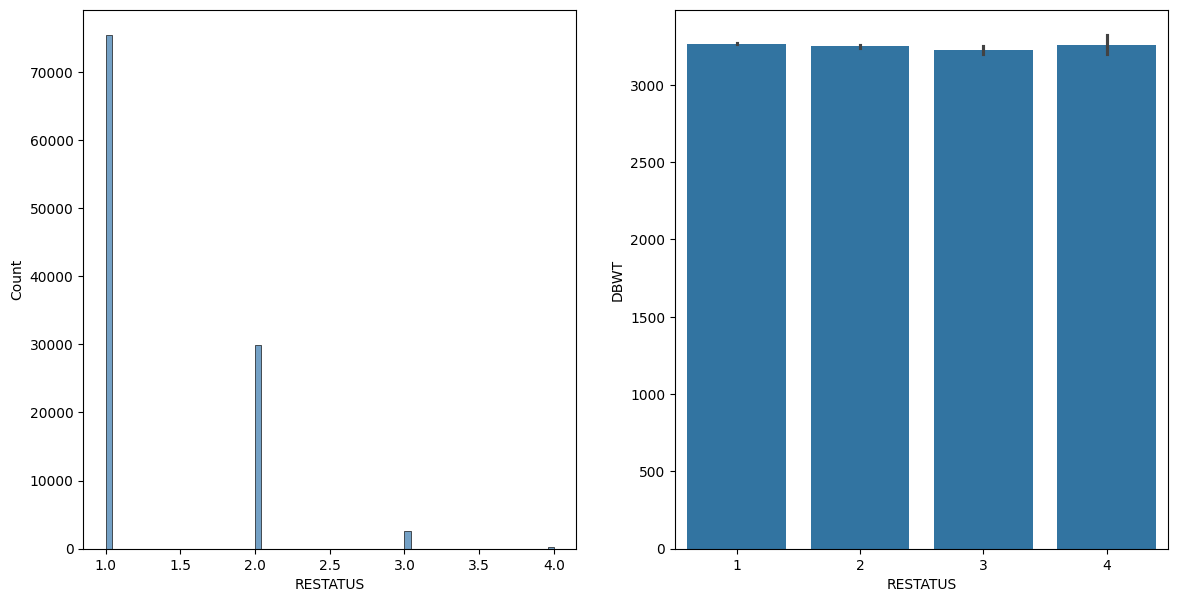

In [ ]:
show_cat_feature('RESTATUS')

In [ ]:
train_data['RESTATUS'] = train_data['RESTATUS'].astype('category')
test_data['RESTATUS'] = test_data['RESTATUS'].astype('category')

## RF_CESAR - Previous Cesarean

N    91041
Y    17041
Name: RF_CESAR, dtype: int64

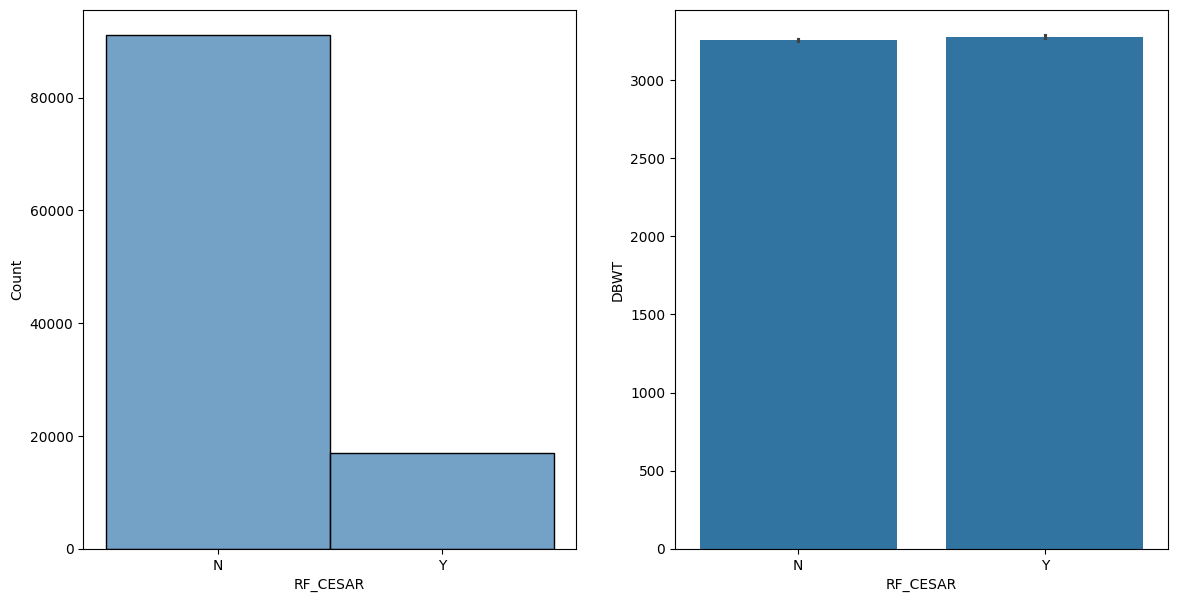

In [ ]:
show_cat_feature('RF_CESAR')

In [ ]:
# train_data['RF_CESAR'] = train_data['RF_CESAR'].astype('category')
# test_data['RF_CESAR'] = test_data['RF_CESAR'].astype('category')

In [ ]:
train_data.drop('RF_CESAR',axis=1,inplace=True)
test_data.drop('RF_CESAR',axis=1,inplace=True)

## RF_CESARN - Number of Previous Cesareans

0     91041
1     11715
2      3905
3      1103
4       230
5        40
99       40
6         4
7         2
9         1
8         1
Name: RF_CESARN, dtype: int64

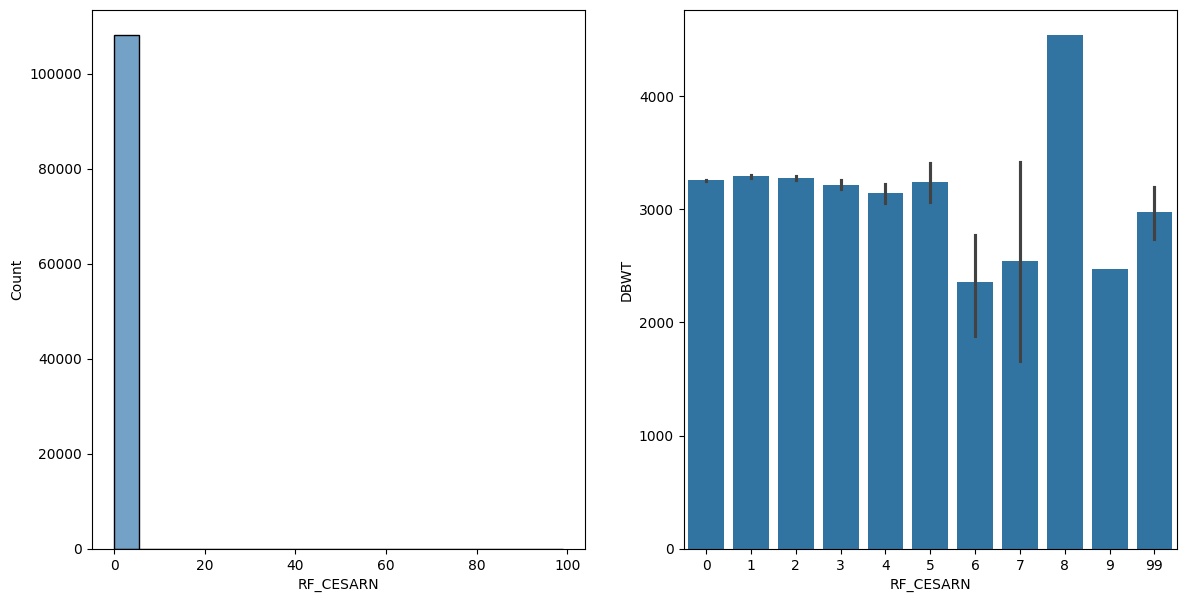

In [ ]:
show_cat_feature('RF_CESARN')

In [ ]:
# as seen there is a tendency to decline BW with increasung numbers of cesarian. But 8 or 9 cesarians is wery rare in a routine praxis, and the data for it has hight variability, so I will
# merge all data for cesarians more than 5, and accume that unknown status is 0. NOTE: indications for cesarian often include as very large BW, as well Low for gestational age weight.

In [ ]:
train_data['RF_CESARN'] = train_data['RF_CESARN'].apply(lambda x: 5 if (x > 5) and (x != 99) else x)
train_data['RF_CESARN'] = train_data['RF_CESARN'].apply(lambda x: 0 if x == 99 else x)

In [ ]:
train_data['RF_CESARN'] = train_data['RF_CESARN'].astype('category')
test_data['RF_CESARN'] = test_data['RF_CESARN'].astype('category')

## SEX - Sex of Infant

M    55326
F    52756
Name: SEX, dtype: int64

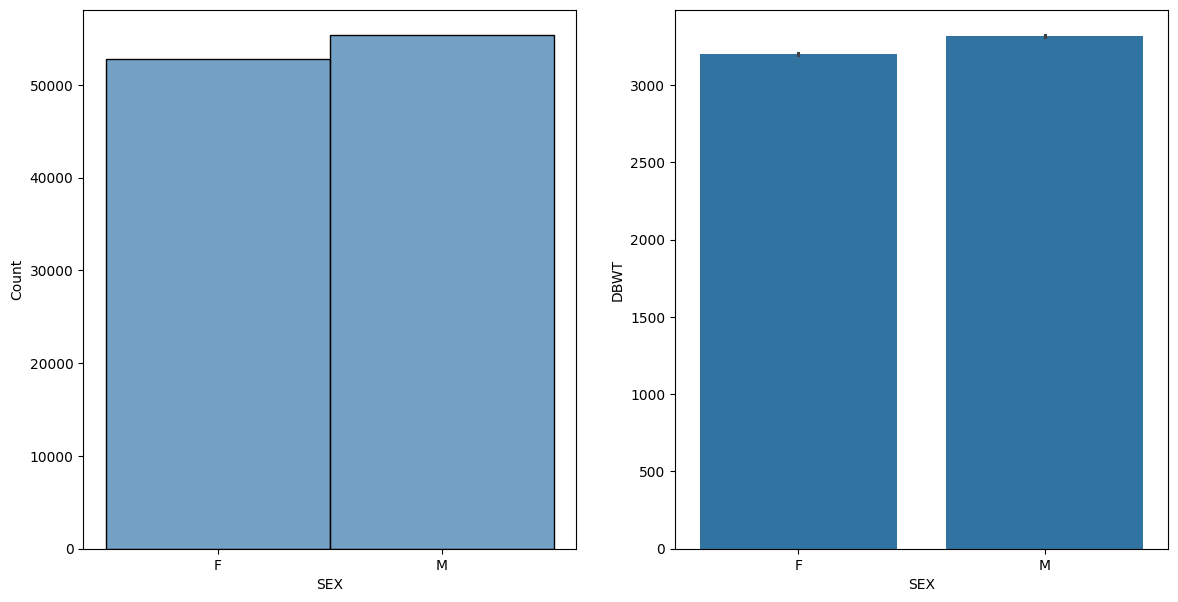

In [ ]:
show_cat_feature('SEX')

## WTGAIN - Weight Gain

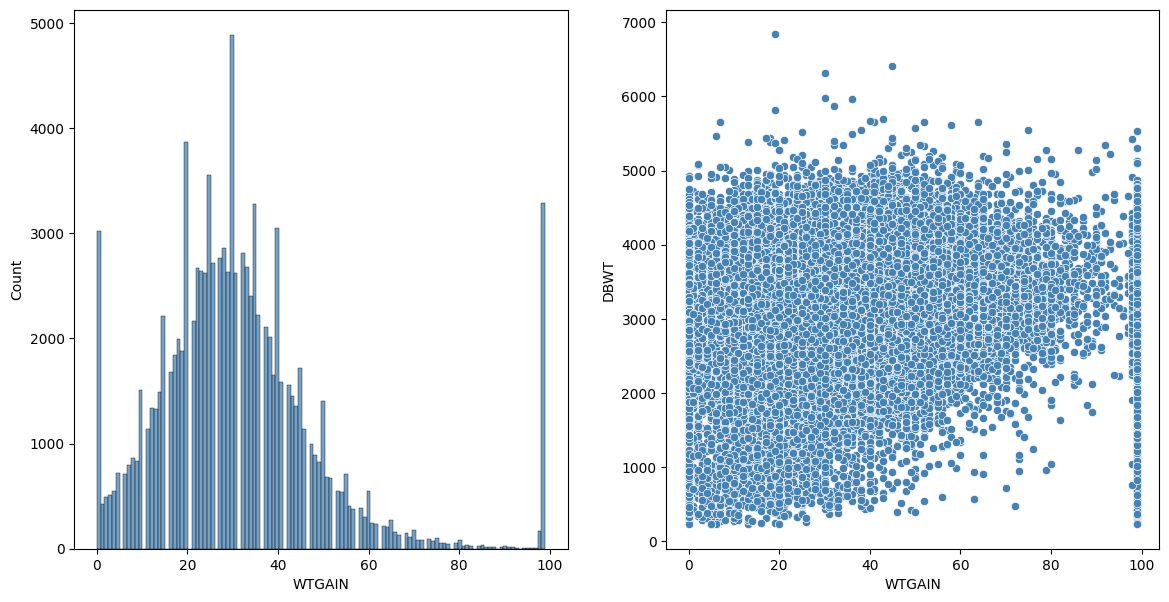

In [ ]:
show_num_feature('WTGAIN')

00-97  - Weight gain in pounds

98 - 98 pounds and over


99 Unknown or not stated


In [ ]:
convert_to_median('WTGAIN')

# Baseline Model

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
numerical_features = train_data._get_numeric_data().columns
categorical_features = train_data.drop(numerical_features, axis = 1).columns

In [ ]:
numerical_features

Index(['ATTEND', 'BFACIL', 'BMI', 'CIG_0', 'DLMP_MM', 'DOB_MM', 'FAGECOMB',
       'ILP_R', 'MAGER', 'M_Ht_In', 'PREVIS', 'WTGAIN', 'DBWT', 'approx_term'],
      dtype='object')

In [ ]:
categorical_features

Index(['DMAR', 'DOB_WK', 'FEDUC', 'LD_INDL', 'MBSTATE_REC', 'MEDUC',
       'NO_INFEC', 'NO_MMORB', 'NO_RISKS', 'PAY_REC', 'PRECARE', 'PRIORDEAD',
       'PRIORLIVE', 'PRIORTERM', 'RDMETH_REC', 'RESTATUS', 'RF_CESARN', 'SEX'],
      dtype='object')

In [ ]:
for col in categorical_features:
  train_data[col] = train_data[col].astype('category')
  test_data[col] = test_data[col].astype('category')

In [ ]:
X = train_data.drop('DBWT', axis = 1)
y = train_data['DBWT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
params = {'n_estimators': 200,
        'learning_rate': 0.01,
        'max_depth': 5,
        'subsample': 0.3,
        'colsample_bytree': 0.3,
        'gamma': 1e-6,
        'random_state': 42}

In [ ]:
xgb_reg = XGBRegressor(**params, enable_categorical=True)


In [ ]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=1e-06, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_reg.predict(X_test)

In [ ]:
xgb_r2_score = r2_score(y_test, y_pred)
xgb_r2_score

0.250981857388645

In [ ]:
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_mse

258648.49204510642

##tuning

In [ ]:
!pip install optuna

In [ ]:
import optuna

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'random_state': 42
    }

    xgb_model = XGBRegressor(**params, enable_categorical=True)

    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    return mse

In [ ]:
study = optuna.create_study(direction='minimize')

[I 2024-03-21 12:59:50,264] A new study created in memory with name: no-name-760bb86c-3d22-488d-aff0-c6db9bdb4dec


In [ ]:
study.optimize(objective, n_trials=200)

[I 2024-03-21 13:11:09,886] Trial 50 finished with value: 217685.58963803263 and parameters: {'n_estimators': 252, 'learning_rate': 0.03523930442041982, 'max_depth': 4, 'subsample': 0.7905424163004113, 'colsample_bytree': 0.7292109928950129, 'gamma': 6.142757400833544e-05}. Best is trial 38 with value: 216553.35146486474.
[I 2024-03-21 13:11:11,211] Trial 51 finished with value: 217885.3518029109 and parameters: {'n_estimators': 275, 'learning_rate': 0.04114344739442927, 'max_depth': 6, 'subsample': 0.728864237557035, 'colsample_bytree': 0.7026744275694269, 'gamma': 4.2247104791413734e-08}. Best is trial 38 with value: 216553.35146486474.
[I 2024-03-21 13:11:12,602] Trial 52 finished with value: 217913.54278161508 and parameters: {'n_estimators': 280, 'learning_rate': 0.04886430216274772, 'max_depth': 6, 'subsample': 0.7241184700628541, 'colsample_bytree': 0.6772553177877552, 'gamma': 2.5475456049964377e-08}. Best is trial 38 with value: 216553.35146486474.
[I 2024-03-21 13:11:13,638] 

In [ ]:
best_params = study.best_params
best_params

{'n_estimators': 254,
 'learning_rate': 0.05670187680923467,
 'max_depth': 6,
 'subsample': 0.7718118476778161,
 'colsample_bytree': 0.6783076646945088,
 'gamma': 1.0183466224246372e-08}

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [ ]:
XGB_cv = cross_val_score(XGBRegressor(**best_params, enable_categorical=True),
                          X,
                          y,
                          cv = skf,
                          scoring = 'neg_root_mean_squared_error',
                          n_jobs = -1)

print(f"The 10 folds oof RMSE of the XGB model is {-1*XGB_cv.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


The 10 folds oof RMSE of the XGB model is 465.0742820702846


In [ ]:
model = XGBRegressor(**best_params, enable_categorical=True)

md_preds = pd.DataFrame()
md_preds['model'] = cross_val_predict(model, X, y, cv = skf, n_jobs = -1)

md_preds_test = pd.DataFrame()
md_preds_test['model'] = model.fit(X, y).predict(test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
from sklego.linear_model import QuantileRegression

In [ ]:
alpha = 0.1 # the competition alpha
MWIS_scores, coverage_scores = list(), list()

for i, (train_idx, test_idx) in enumerate(skf.split(md_preds, y)):

    X_train, X_test = md_preds.iloc[train_idx], md_preds.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    print('----------------------------------------------------------')

    q_low = QuantileRegression(quantile = 0.05).fit(X_train, y_train)
    q_up = QuantileRegression(quantile = 0.95).fit(X_train, y_train)

    predictions = pd.DataFrame()
    predictions['y_true'] = y_test
    predictions['pi_lower'] = q_low.predict(X_test)
    predictions['pi_upper'] = q_up.predict(X_test)

    MWIS, coverage = MWIS_metric.score(predictions['y_true'], predictions['pi_lower'], predictions['pi_upper'], alpha)
    MWIS_scores.append(MWIS)
    coverage_scores.append(coverage)

    print('Fold', i, '==> MWI score is ==>', round(MWIS, 3))
    print('Fold', i, '==> Predictions coverage ==>', round(coverage*100, 1),'%')

print('\n')
print(f"The average 10-folds oof MWIS score of the linear quantile regressor is {np.mean(MWIS_scores)}")
print(f"The average 10-folds oof coverage of the linear quantile regressor is {np.mean(coverage_scores)}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


----------------------------------------------------------
Fold 0 ==> MWI score is ==> 1996.771
Fold 0 ==> Predictions coverage ==> 90.1 %
----------------------------------------------------------
Fold 1 ==> MWI score is ==> 1992.672
Fold 1 ==> Predictions coverage ==> 89.9 %
----------------------------------------------------------
Fold 2 ==> MWI score is ==> 1989.201
Fold 2 ==> Predictions coverage ==> 90.1 %
----------------------------------------------------------
Fold 3 ==> MWI score is ==> 2005.965
Fold 3 ==> Predictions coverage ==> 89.8 %
----------------------------------------------------------
Fold 4 ==> MWI score is ==> 1997.574
Fold 4 ==> Predictions coverage ==> 90.1 %


The average 10-folds oof MWIS score of the linear quantile regressor is 1996.436577550469
The average 10-folds oof coverage of the linear quantile regressor is 0.8999648338391733


In [ ]:
q_low = QuantileRegression(quantile = 0.05).fit(md_preds, y)
q_up = QuantileRegression(quantile = 0.95).fit(md_preds, y)

submission['pi_lower'] = q_low.predict(md_preds_test)
submission['pi_upper'] = q_up.predict(md_preds_test)
submission.head()

,id,pi_lower,pi_upper
0,108082,2743.260348,4166.175846
1,108083,2291.828157,3859.708962
2,108084,2362.655880,3907.792266
3,108085,2492.815726,3996.154778
4,108086,2383.074600,3921.654064


In [ ]:
submission.shape

(5689, 3)

In [ ]:
submission.to_csv('baseline_submission_3.csv', index = False)



In [ ]:
subm_expl = pd.read_csv('/content/drive/MyDrive/Kaggle/birthweight/sample_submission.csv')
subm_expl

,id,pi_lower,pi_upper
0,108082,0,10000
1,108083,0,10000
2,108084,0,10000
3,108085,0,10000
4,108086,0,10000
...,...,...,...
5684,113766,0,10000
5685,113767,0,10000
5686,113768,0,10000
5687,113769,0,10000
